In [310]:
import requests, re
from bs4 import BeautifulSoup
import nltk
import random
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import movie_reviews, stopwords
stop_words = stopwords.words('english')
stop_words.append(".")
stop_words.append(",")
stop_words.append("-")
stop_words.append(";")
stop_words.append("’")
stop_words.append("us")
stop_words.append("'s")
stop_words.append("%")

In [181]:
r = requests.get("https://www.taoiseach.gov.ie/eng/News/Taoiseach's_Speeches/New%20Year's%20Day%20Statement%20by%20An%20Taoiseach.html")
c = r.content

In [182]:
soup = BeautifulSoup(c, "html.parser")

#print(soup.prettify())

In [183]:
all = soup.find("div", {"class":"contentSub"}).text


In [184]:
all = all.replace("\xa0","")
all = all.replace("\r\n","")
all = all.replace("var mapOverlayUrl = ''","")


In [185]:
# text = all.find_all("div", {"dir":"ltr"})[0].text
# text

In [186]:
# with open("C:/Users/Johnny/Desktop/Data Science/Project/speech1.txt", "w") as out_file:
#     out_file.write(text)

# Scrape links to speeches


In [187]:
r1 = requests.get("https://www.taoiseach.gov.ie/eng/News/Taoiseach's_Speeches/")
c1 = r1.content

In [188]:
soup = BeautifulSoup(c1, "html.parser")
#print(soup.prettify())

In [189]:
all = soup.find_all("span",{"class":"ItemName"})
for a in all:
    print(a.find("a")["href"])

/eng/News/Taoiseach's_Speeches/New Year's Day Statement by An Taoiseach.html
/eng/News/Taoiseach's_Speeches/Speech_by_An_Taoiseach_Official_opening_of_new_Barclays_Offices.html
/eng/News/Taoiseach's_Speeches/Speech_of_An_Taoiseach_Disruptive_Technologies_Innovation_Fund_Monday_10_December_2018.html
/eng/News/Taoiseach's_Speeches/Speech_of_An_Taoiseach_Leo_Varadkar_T_D_TEG_%E2%80%93_Jobs_Announcement_Mullingar_7_December_2018.html
/eng/News/Taoiseach's_Speeches/Speech_by_An_Taoiseach_Launch_of_The_Sunday_Papers_Irish_Times_Building_Tara_Street_Tuesday_4_December_2018.html
/eng/News/Taoiseach's_Speeches/Speech_of_An_Taoiseach_Votail_100_Reception_St_Patrick_s_Hall_Dublin_Castle.html
/eng/News/Taoiseach's_Speeches/Speech_by_An_Taoiseach_at_the_Garda_Passing_out_Parade_Garda_College_Templemore_.html
/eng/News/Taoiseach's_Speeches/Speech_by_An_Taoiseach_Announcement_of_First_Round_of_Funding_for_the_Climate_Action_Fund.html
/eng/News/Taoiseach's_Speeches/Announcement_of_First_Round_of_Fundi

# 2013 - 2019 Speeches

In [190]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Taoiseach's_Speeches/?pageNumber="
speech_string_2018 = ""
speech_string_2017 = ""
speech_string_2016 = ""
speech_string_2015 = ""
speech_string_2014 = ""
speech_string_2013 = ""

leo_string = ""
enda_string = ""
brian_string = ""
bertie_string = ""

count = 1

for page in range(1,38):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
        if count < 54:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2018/2018_speech_" + str(54 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2018 += all
        elif count < 127:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2017/2017_speech_" + str(127 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2017 += all
        elif count < 204:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2016/2016_speech_" + str(204 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2016 += all
        elif count < 304:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2015/2015_speech_" + str(304 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2015 += all
        elif count < 366:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2014/2014_speech_" + str(366 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2014 += all
        elif count < 370:
            #with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2013/2013_speech_" + str(370 - count) + ".txt", "w", encoding="utf-8") as out_file:
                #out_file.write(all)
            speech_string_2013 += all
        count = count + 1


In [191]:
#2018
count = 53
speech_string_2018 = speech_string_2018.lower()
words_2018 = word_tokenize(speech_string_2018)

print("There were %d speeches in 2018 with %d words with an average of %d per speech" % (count, len(words_2018), len(words_2018)/(count)))
print()

words_2018 = [w for w in words_2018 if not w in stop_words]
all_words_2018 = nltk.FreqDist(words_2018)

print("There were %d speeches in 2018 with %d words with an average of %d per speech" % (count, len(words_2018), len(words_2018)/(count)))
print()

print(all_words_2018.most_common(100))


There were 53 speeches in 2018 with 78472 words with an average of 1480 per speech

There were 53 speeches in 2018 with 38198 words with an average of 720 per speech

[('ireland', 534), ('people', 282), ('new', 233), ('also', 226), ('irish', 211), ('world', 176), ('government', 172), ('future', 167), ('today', 162), ('country', 159), ('year', 158), ('years', 153), ('one', 153), ('–', 152), ('‘', 141), ('like', 131), ('want', 130), ('public', 127), ('work', 126), ('time', 121), ('first', 118), ('good', 118), ('many', 114), ('women', 113), ('would', 108), ('next', 105), ('investment', 104), ('need', 101), ('way', 97), ('know', 97), ('development', 93), ('european', 92), ('eu', 91), ('make', 89), ('taoiseach', 88), ('economic', 88), ('believe', 86), ('services', 84), ('million', 84), ('jobs', 83), ('ensure', 82), ('dublin', 81), ('history', 81), ('economy', 81), ('change', 80), ('plan', 79), ('rural', 79), ('europe', 79), ('well', 78), ('better', 78), ('see', 76), ('2040', 75), ('project'

In [192]:
#2017
count = 73
speech_string_2017 = speech_string_2017.lower()
words_2017 = word_tokenize(speech_string_2017)

print("There were %d speeches in 2017 with %d words with an average of %d per speech" % (count, len(words_2017), len(words_2017)/(count)))
print()

words_2017 = [w for w in words_2017 if not w in stop_words]
all_words_2017 = nltk.FreqDist(words_2017)

print("There were %d speeches in 2017 with %d words with an average of %d per speech" % (count, len(words_2017), len(words_2017)/(count)))
print()

print(all_words_2017.most_common(100))


There were 73 speeches in 2017 with 116572 words with an average of 1596 per speech

There were 73 speeches in 2017 with 57235 words with an average of 784 per speech

[('ireland', 897), ('people', 379), ('irish', 344), ('also', 326), ('government', 322), ('eu', 322), ('new', 319), ('work', 280), ('european', 274), ('brexit', 225), ('–', 217), ('future', 204), ('years', 197), ('one', 196), ('country', 190), ('economic', 189), ('want', 185), ('world', 181), ('minister', 179), ('many', 178), ('year', 165), ('time', 156), ('trade', 154), ('‘', 145), ('need', 145), ('would', 145), ('good', 144), ('investment', 142), ('continue', 139), ('uk', 136), ('today', 134), ('national', 133), ('great', 130), ('challenges', 130), ('europe', 129), ('plan', 129), ('taoiseach', 128), ('first', 128), ('peace', 127), ('believe', 125), ('last', 124), ('economy', 124), ('important', 120), ('states', 116), ('like', 116), ('northern', 114), ('support', 114), ('including', 114), ('island', 113), ('across', 112)

In [193]:
#2016
count = 77
speech_string_2016 = speech_string_2016.lower()
words_2016 = word_tokenize(speech_string_2016)

print("There were %d speeches in 2016 with %d words with an average of %d per speech" % (count, len(words_2016), len(words_2016)/(count)))
print()

words_2016 = [w for w in words_2016 if not w in stop_words]
all_words_2016 = nltk.FreqDist(words_2016)

print("There were %d speeches in 2016 with %d words with an average of %d per speech" % (count, len(words_2016), len(words_2016)/(count)))
print()

print(all_words_2016.most_common(100))


There were 77 speeches in 2016 with 119688 words with an average of 1554 per speech

There were 77 speeches in 2016 with 59760 words with an average of 776 per speech

[('ireland', 843), ('government', 515), ('eu', 433), ('people', 398), ('new', 396), ('irish', 369), ('also', 349), ('uk', 349), ('european', 323), ('work', 295), ('economic', 292), ('–', 258), ('many', 219), ('economy', 199), ('minister', 193), ('would', 189), ('jobs', 184), ('plan', 183), ('year', 176), ('support', 169), ('one', 163), ('continue', 162), ('time', 162), ('future', 158), ('country', 158), ('trade', 157), ('years', 152), ('important', 151), ('want', 150), ('today', 149), ('council', 147), ('first', 141), ('need', 140), ('northern', 139), ('make', 139), ('ensure', 136), ('international', 135), ('across', 134), ('last', 133), ('issues', 131), ('union', 131), ('investment', 130), ('part', 130), ('public', 130), ('strong', 125), ('services', 122), ('process', 121), ('development', 118), ('state', 117), ('busine

In [194]:
#2015
count = 100
speech_string_2015 = speech_string_2015.lower()
words_2015 = word_tokenize(speech_string_2015)

print("There were %d speeches in 2015 with %d words with an average of %d per speech" % (count, len(words_2015), len(words_2015)/(count)))
print()

words_2015 = [w for w in words_2015 if not w in stop_words]
all_words_2015 = nltk.FreqDist(words_2015)

print("There were %d speeches in 2015 with %d words with an average of %d per speech" % (count, len(words_2015), len(words_2015)/(count)))
print()

print(all_words_2015.most_common(100))

print("The word Brexit occurs " + str(all_words_2015["brexit"]) + " times")

There were 100 speeches in 2015 with 126372 words with an average of 1263 per speech

There were 100 speeches in 2015 with 63459 words with an average of 634 per speech

[('ireland', 902), ('government', 485), ('new', 482), ('jobs', 480), ('people', 465), ('irish', 405), ('work', 360), ('also', 316), ('plan', 289), ('recovery', 280), ('year', 279), ('economic', 249), ('european', 227), ('–', 224), ('economy', 204), ('support', 198), ('eu', 190), ('investment', 181), ('years', 179), ('first', 178), ('many', 175), ('country', 174), ('today', 162), ('public', 160), ('growth', 157), ('tax', 157), ('last', 155), ('agreement', 155), ('would', 150), ('northern', 148), ('continue', 147), ('one', 146), ('‘', 146), ('time', 145), ('minister', 142), ('make', 141), ('across', 140), ('2015', 139), ('job', 138), ('sector', 138), ('world', 136), ('like', 136), ('business', 134), ('action', 130), ('taoiseach', 128), ('must', 128), ('families', 128), ('know', 127), ('need', 125), ('part', 125), ('futur

In [195]:
#2014
count = 62
speech_string_2014 = speech_string_2014.lower()
words_2014 = word_tokenize(speech_string_2014)

print("There were %d speeches in 2014 with %d words with an average of %d per speech" % (count, len(words_2014), len(words_2014)/(count)))
print()

words_2014 = [w for w in words_2014 if not w in stop_words]
all_words_2014 = nltk.FreqDist(words_2014)

print("There were %d speeches in 2014 with %d words with an average of %d per speech" % (count, len(words_2014), len(words_2014)/(count)))
print()

print(all_words_2014.most_common(100))


There were 62 speeches in 2014 with 81514 words with an average of 1314 per speech

There were 62 speeches in 2014 with 41043 words with an average of 661 per speech

[('ireland', 515), ('government', 318), ('new', 307), ('people', 255), ('jobs', 239), ('also', 195), ('irish', 182), ('work', 181), ('plan', 178), ('economic', 156), ('year', 153), ('public', 153), ('recovery', 140), ('country', 137), ('economy', 136), ('investment', 132), ('european', 124), ('today', 122), ('years', 117), ('last', 117), ('sector', 117), ('one', 116), ('would', 108), ('first', 107), ('make', 104), ('time', 103), ('support', 97), ('international', 96), ('need', 93), ('business', 93), ('many', 92), ('know', 92), ('2014', 91), ('(', 91), (')', 91), ('world', 90), ('eu', 89), ('national', 89), ('state', 86), ('taoiseach', 85), ('services', 84), ('next', 83), ('tax', 82), ('growth', 81), ('part', 81), ('important', 80), ('‘', 80), ('minister', 80), ('council', 78), ('across', 78), ('companies', 78), ('see', 76

In [196]:
#2013
# count = 3
# speech_string_2013 = speech_string_2013.lower()
# words_2013 = word_tokenize(speech_string_2013)

# print("There were %d speeches in 2013 with %d words with an average of %d per speech" % (count, len(words_2013), len(words_2013)/(count)))
# print()

# words_2013 = [w for w in words_2013 if not w in stop_words]
# all_words_2013 = nltk.FreqDist(words_2013)

# print("There were %d speeches in 2013 with %d words with an average of %d per speech" % (count, len(words_2013), len(words_2013)/(count)))
# print()

# print(all_words_2013.most_common(100))
# print()
# print(all_words_2013["abortion"])
# print(all_words_2013["recession"])
# recession_2013 = all_words_2013["recession"]/len(words_2013)*100
# print(recession_2013)
# print(all_words_2013["bailout"])
# print()
# print(all_words_2013["brexit"])

In [197]:
#2013-19 combined
# count = 368
# speech_string_2013_19 = speech_string_2013_19.lower()
# words_2013_19 = word_tokenize(speech_string_2013_19)

# print("There were %d speeches in 2013-19 with %d words with an average of %d per speech" % (count, len(words_2013_19), len(words_2013_19)/(count)))
# print()

# words_2013_19 = [w for w in words_2013_19 if not w in stop_words]
# all_words_2013_19 = nltk.FreqDist(words_2013_19)

# print("There were %d speeches in 2013-19 with %d words with an average of %d per speech" % (count, len(words_2013_19), len(words_2013_19)/(count)))
# print()

# print(all_words_2013_19.most_common(100))
# print(all_words_2013_19["tiger"])
# print(all_words_2013_19["brexit"])

# 2012 Speeches

In [286]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2012/Taoiseach's_Speeches_2012?pageNumber="
speech_string_2012 = ""

count = 1
for page in range(1,6):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2012/2012_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        speech_string_2012 += all
        item = (word_tokenize(all), "fg")
        speech_list.append(item)
        
#print(speech_string_2012)
print(str(count - 1) + " speeches in 2012")

44 speeches in 2012


In [199]:
count = 44
speech_string_2012 = speech_string_2012.lower()
words_2012 = word_tokenize(speech_string_2012)

print("There were %d speeches in 2012 with %d words with an average of %d per speech" % (count, len(words_2012), len(words_2012)/(count)))
print()

words_2012 = [w for w in words_2012 if not w in stop_words]
all_words_2012 = nltk.FreqDist(words_2012)

print("There were %d speeches in 2012 with %d words with an average of %d per speech" % (count, len(words_2012), len(words_2012)/(count)))
print()

print(all_words_2012.most_common(100))


There were 44 speeches in 2012 with 69677 words with an average of 1583 per speech

There were 44 speeches in 2012 with 35123 words with an average of 798 per speech

[('ireland', 582), ('government', 276), ('irish', 268), ('european', 241), ('people', 233), ('new', 208), ('economic', 204), ('also', 185), ('growth', 177), ('work', 165), ('jobs', 161), ('year', 150), ('council', 138), ('country', 118), ('important', 115), ('last', 115), ('investment', 109), ('international', 107), ('europe', 104), ('many', 104), ('public', 103), ('support', 101), ('would', 100), ('economy', 99), ('today', 98), ('world', 98), ('business', 97), ('one', 96), ('programme', 91), ('need', 90), ('eu', 88), ('meeting', 86), ('first', 86), ('time', 84), ('services', 84), ('financial', 83), ('president', 82), ('recovery', 79), ('plan', 77), ('continue', 77), ('years', 75), ('future', 72), (':', 71), ('made', 71), ('market', 71), ('make', 70), ('member', 69), ('national', 69), ('union', 68), ('including', 67), ('w

# 2011 Speeches


In [285]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2011/Taoiseach's_Speeches_2011?pageNumber="
speech_string_2011 = ""

count = 1
for page in range(1,5):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2011/2011_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        speech_string_2011 += all
        item = (word_tokenize(all), "fg")
        speech_list.append(item)
        
#print(speech_string_2011)
print(str(count - 1) + " speeches in 2011")

38 speeches in 2011


In [201]:
count = 38
speech_string_2011 = speech_string_2011.lower()
words_2011 = word_tokenize(speech_string_2011)

print("There were %d speeches in 2011 with %d words with an average of %d per speech" % (count, len(words_2011), len(words_2011)/(count)))
print()

words_2011 = [w for w in words_2011 if not w in stop_words]
all_words_2011 = nltk.FreqDist(words_2011)

print("There were %d speeches in 2011 with %d words with an average of %d per speech" % (count, len(words_2011), len(words_2011)/(count)))
print()

print(all_words_2011.most_common(100))


There were 38 speeches in 2011 with 63747 words with an average of 1677 per speech

There were 38 speeches in 2011 with 31218 words with an average of 821 per speech

[('ireland', 339), ('...', 277), ('government', 241), ('people', 187), ('european', 185), ('also', 180), ('new', 180), ('economic', 150), ('irish', 141), ('council', 133), ('work', 132), ('public', 111), ('country', 111), ('would', 104), ('programme', 99), ('business', 99), ('meeting', 95), ('national', 95), ('need', 92), ('first', 86), ('economy', 82), ('many', 80), ('growth', 77), ('must', 76), ('jobs', 76), ('member', 74), ('state', 74), ('states', 73), ('support', 73), ('energy', 72), ('make', 72), ('area', 71), ('time', 71), ('house', 69), ('euro', 68), ('one', 68), ('services', 67), ("'", 67), ('made', 65), ('today', 65), ('measures', 64), ('president', 64), ('including', 63), ('international', 63), ('important', 63), ('part', 63), (':', 63), ('system', 63), ('take', 62), ('future', 62), ('ensure', 62), ('world', 62

# 2010 Speeches

In [288]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2010/Taoiseach's_Speeches_2010?pageNumber="
speech_string_2010 = ""

count = 1
for page in range(1,6):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2010/2010_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        speech_string_2010 += all
        item = (word_tokenize(all), "ff")
        speech_list.append(item)
        
#print(speech_string_2010)
print(str(count - 1) + " speeches in 2010")

45 speeches in 2010


In [203]:
count = 46
speech_string_2010 = speech_string_2010.lower()
words_2010 = word_tokenize(speech_string_2010)

print("There were %d speeches in 2010 with %d words with an average of %d per speech" % (count, len(words_2010), len(words_2010)/(count)))
print()

words_2010 = [w for w in words_2010 if not w in stop_words]
all_words_2010 = nltk.FreqDist(words_2010)

print("There were %d speeches in 2010 with %d words with an average of %d per speech" % (count, len(words_2010), len(words_2010)/(count)))
print()

print(all_words_2010.most_common(100))


There were 46 speeches in 2010 with 64089 words with an average of 1393 per speech

There were 46 speeches in 2010 with 32464 words with an average of 705 per speech

[('ireland', 352), ('new', 233), ('government', 194), ('people', 165), ('irish', 163), ('also', 161), ('economic', 150), ('economy', 145), ('public', 116), ('would', 115), ('innovation', 113), ('companies', 110), ('today', 109), ('investment', 107), ('important', 105), ('like', 97), ('many', 97), ('business', 97), ('future', 97), ('services', 93), ('growth', 91), ('jobs', 90), ('year', 90), ('work', 88), ('years', 84), ('development', 82), ('sector', 82), ('research', 81), ('need', 80), ('international', 74), ('well', 74), ('europe', 73), ('country', 73), ('european', 72), ('support', 72), ('great', 71), ('national', 69), ('time', 69), ('part', 68), ('education', 67), ('world', 66), ('enterprise', 65), ('one', 65), ('programme', 65), ('made', 64), ('best', 64), ('place', 63), ('service', 61), ('global', 60), ('last', 60),

# 2009 Speeches

In [289]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2009/Taoiseach's_Speeches_2009?pageNumber="
speech_string_2009 = ""

count = 1
for page in range(1,6):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2009/2009_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        speech_string_2009 += all
        item = (word_tokenize(all), "ff")
        speech_list.append(item)
        
        
#print(speech_string_2009)
print(str(count - 1) + " speeches in 2009")

41 speeches in 2009


In [205]:
count = 41
speech_string_2009 = speech_string_2009.lower()
words_2009 = word_tokenize(speech_string_2009)

print("There were %d speeches in 2009 with %d words with an average of %d per speech" % (count, len(words_2009), len(words_2009)/(count)))
print()

words_2009 = [w for w in words_2009 if not w in stop_words]
all_words_2009 = nltk.FreqDist(words_2009)

print("There were %d speeches in 2009 with %d words with an average of %d per speech" % (count, len(words_2009), len(words_2009)/(count)))
print()

print(all_words_2009.most_common(100))

print(all_words_2009["recession"])
recession_2009 = all_words_2009["recession"]/len(words_2009)*100
print(recession_2009)


There were 41 speeches in 2009 with 64672 words with an average of 1577 per speech

There were 41 speeches in 2009 with 32599 words with an average of 795 per speech

[('ireland', 326), ('new', 235), ('economic', 181), ('government', 178), ('also', 177), ('economy', 169), ('irish', 168), ('people', 141), ('public', 134), ('business', 112), ('work', 111), ('many', 109), ('support', 103), ('years', 101), ('agus', 101), ('jobs', 99), ('would', 96), ('future', 93), ('companies', 93), ('international', 88), ('services', 88), ('development', 87), ('investment', 86), ('must', 85), ('today', 83), ('european', 80), ('global', 79), ('national', 77), ('one', 77), ('service', 75), ('innovation', 75), ('council', 75), ('na', 74), ('need', 73), ('year', 72), ('social', 71), ('great', 71), ('union', 71), ('world', 70), ('first', 68), ('time', 67), ('well', 66), ('report', 66), ('country', 65), ('enterprise', 65), ('make', 65), ('go', 65), ('smart', 64), ('want', 64), ('research', 60), ('way', 59), ('

# 2008 Speeches

In [206]:
# base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2008/Taoiseach's_Speeches_2008?pageNumber="
# speech_string_2008 = ""

# count = 1
# for page in range(1,6):
#     r = requests.get(base_url + str(page))
#     c = r.content
#     soup = BeautifulSoup(c, "html.parser")
#     all = soup.find_all("span",{"class":"ItemName"})
#     for a in all:
#         r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
#         c = r.content
        
#         soup = BeautifulSoup(c, "html.parser")
#         all = soup.find("div", {"class":"contentSub"}).text
#         all = all.replace("var mapOverlayUrl = '';","")
        
# #         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2008/2008_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
# #             out_file.write(all)
#         count = count + 1
        
#         speech_string_2008 += all
        
# #print(speech_string_2008)
# print(str(count - 1) + " speeches in 2008")

In [207]:
# count = 2
# speech_string_2008 = speech_string_2008.lower()
# words_2008 = word_tokenize(speech_string_2008)

# print("There were %d speeches in 2008 with %d words with an average of %d per speech" % (count, len(words_2008), len(words_2008)/(count)))
# print()

# words_2008 = [w for w in words_2008 if not w in stop_words]
# all_words_2008 = nltk.FreqDist(words_2008)

# print("There were %d speeches in 2008 with %d words with an average of %d per speech" % (count, len(words_2008), len(words_2008)/(count)))
# print()

# print(all_words_2008.most_common(100))
# print(all_words_2008["tiger"])
# print(all_words_2008["celtic"])
# print()
# print(all_words_2008["abortion"])
# print(all_words_2008["recession"])
# print(all_words_2008["bailout"])
# print()

# 2007 & 2006 unavailable

# 2005 Speeches

In [278]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2005/Taoiseach's_Speeches_Archive_2005/?pageNumber="
speech_string_2005 = ""

count = 1
for page in range(1,17):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2005/2005_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        speech_string_2005 += all
        item = (word_tokenize(all), "ff")
        speech_list.append(item)
        
        
#print(speech_string_2005)
print(str(count - 1) + " speeches in 2005")

152 speeches in 2005


In [209]:
count = 152
speech_string_2005 = speech_string_2005.lower()
words_2005 = word_tokenize(speech_string_2005)

print("There were %d speeches in 2005 with %d words with an average of %d per speech" % (count, len(words_2005), len(words_2005)/(count)))
print()

words_2005 = [w for w in words_2005 if not w in stop_words]
all_words_2005 = nltk.FreqDist(words_2005)
print("There were %d speeches in 2005 with %d words with an average of %d per speech" % (count, len(words_2005), len(words_2005)/(count)))
print()

print(all_words_2005.most_common(100))


There were 152 speeches in 2005 with 193603 words with an average of 1273 per speech

There were 152 speeches in 2005 with 93788 words with an average of 617 per speech

[('ireland', 734), ('people', 591), ('also', 549), ('new', 542), ('–', 441), ('european', 439), ('government', 437), ('years', 432), ('development', 429), ('today', 429), ('many', 393), ('irish', 365), ('would', 357), ('work', 356), ('eu', 323), ('important', 316), ('one', 307), ('social', 307), ('year', 304), ('national', 290), ('union', 285), ('europe', 276), ('know', 263), ('like', 257), ('time', 257), ('future', 254), ('dublin', 251), ('must', 249), ('support', 240), ('economic', 231), ('need', 228), ('success', 226), ('public', 210), ('great', 209), ('services', 201), ('recent', 200), ('community', 194), ('well', 194), ('world', 193), ('business', 191), ('council', 186), ('level', 185), ('delighted', 184), ('economy', 183), ('commitment', 177), ('society', 175), ('growth', 175), ('country', 173), ('see', 173), ('m

# 2004 Speeches

In [277]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2004/Taoiseach's_Speeches_Archive_2004/?pageNumber="
speech_string_2004 = ""

count = 1
for page in range(1,4):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
#         with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2004/2004_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#             out_file.write(all)
        count = count + 1
        
        speech_string_2004 += all
        item = (word_tokenize(all), "ff")
        speech_list.append(item)
        
        
#print(speech_string_2004)
print(str(count - 1) + " speeches in 2004")

30 speeches in 2004


In [211]:
count = 30
speech_string_2004 = speech_string_2004.lower()
words_2004 = word_tokenize(speech_string_2004)

print("There were %d speeches in 2004 with %d words with an average of %d per speech" % (count, len(words_2004), len(words_2004)/(count)))
print()

words_2004 = [w for w in words_2004 if not w in stop_words]
all_words_2004 = nltk.FreqDist(words_2004)

print("There were %d speeches in 2004 with %d words with an average of %d per speech" % (count, len(words_2004), len(words_2004)/(count)))
print()

print(all_words_2004.most_common(100))

print(all_words_2004["recession"])
recession_2004 = all_words_2004["recession"]/len(words_2004)*100
print(recession_2004)


There were 30 speeches in 2004 with 63541 words with an average of 2118 per speech

There were 30 speeches in 2004 with 30717 words with an average of 1023 per speech

[('european', 350), ('union', 236), ('ireland', 217), ('new', 177), ('also', 172), ('work', 163), ('presidency', 159), ('people', 150), ('social', 147), ('government', 146), ('irish', 146), ('agreement', 133), ('economic', 125), ('council', 125), ('eu', 104), ('would', 102), ('europe', 102), ('years', 100), ('progress', 97), ('must', 97), ('time', 95), ('process', 88), ('last', 86), ('one', 85), ('year', 84), ('states', 84), ('growth', 80), ('services', 80), ('economy', 79), ('many', 79), ('forward', 79), ('member', 79), ('investment', 78), ('development', 78), ('today', 76), ('programme', 75), ('public', 75), ('good', 74), ('continue', 74), ('issues', 74), ('partnership', 73), ('support', 73), ('want', 73), ('employment', 72), ('future', 72), ('policy', 71), ('need', 70), ('agenda', 70), ('constitution', 69), ('importan

# 2003 Speeches

In [276]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2003/Taoiseach's_Speeches_Archive_2003/?pageNumber="
speech_string_2003 = ""

count = 1
for page in range(1,5):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2003/2003_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            speech_string_2003 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
#print(speech_string_2003)
print(str(count - 1) + " speeches in 2003")

34 speeches in 2003


In [213]:
count =34
speech_string_2003 = speech_string_2003.lower()
words_2003 = word_tokenize(speech_string_2003)

print("There were %d speeches in 2003 with %d words with an average of %d per speech" % (count, len(words_2003), len(words_2003)/(count)))
print()

words_2003 = [w for w in words_2003 if not w in stop_words]
all_words_2003 = nltk.FreqDist(words_2003)

print("There were %d speeches in 2003 with %d words with an average of %d per speech" % (count, len(words_2003), len(words_2003)/(count)))
print()

print(all_words_2003.most_common(100))


There were 34 speeches in 2003 with 77505 words with an average of 2279 per speech

There were 34 speeches in 2003 with 37690 words with an average of 1108 per speech

[('ireland', 342), ('european', 306), ('also', 216), ('union', 211), ('government', 204), ('work', 186), ('people', 180), ('social', 179), ('economic', 171), ('council', 168), ('agreement', 154), ('development', 153), ('would', 152), ('irish', 151), ('new', 146), ('years', 128), ('must', 119), ('progress', 118), ('many', 116), ('national', 116), ('world', 110), ('international', 109), ('eu', 106), ('public', 105), ('united', 103), ('europe', 103), ('last', 101), ('states', 100), ('countries', 100), ('time', 99), ('issues', 97), ('need', 96), ('security', 95), ('partnership', 94), ('process', 92), ('clear', 91), ('policy', 89), ('good', 88), ('important', 87), ('support', 85), ('year', 83), ('made', 81), ('one', 81), ('together', 79), ('northern', 79), ('minister', 78), ('political', 78), ('part', 78), ('peace', 78), ('be

# 2002 Speeches

In [275]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2002/Taoiseach's_Speeches_Archive_2002/?pageNumber="
speech_string_2002 = ""

count = 1
for page in range(1,9):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2002/2002_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            speech_string_2002 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
#print(speech_string_2002)
print(str(count - 1) + " speeches in 2002")

73 speeches in 2002


In [215]:
count = 73
speech_string_2002 = speech_string_2002.lower()
words_2002 = word_tokenize(speech_string_2002)

print("There were %d speeches in 2002 with %d words with an average of %d per speech" % (count, len(words_2002), len(words_2002)/(count)))
print()

words_2002 = [w for w in words_2002 if not w in stop_words]
all_words_2002 = nltk.FreqDist(words_2002)

print("There were %d speeches in 2002 with %d words with an average of %d per speech" % (count, len(words_2002), len(words_2002)/(count)))
print()

print(all_words_2002.most_common(100))


There were 73 speeches in 2002 with 93878 words with an average of 1286 per speech

There were 73 speeches in 2002 with 45229 words with an average of 619 per speech

[('ireland', 444), ('new', 364), ('people', 347), ('european', 338), ('social', 254), ('also', 254), ('work', 253), ('government', 252), ('europe', 228), ('development', 220), ('irish', 211), ('national', 204), ('union', 203), ('would', 200), ('years', 187), ('economic', 174), ('future', 165), ('many', 158), ('great', 155), ('today', 142), ('important', 139), ('public', 133), ('one', 124), ('eu', 124), ('progress', 121), ('know', 120), ('well', 119), ('country', 118), ('believe', 117), ('support', 117), ('services', 116), ('time', 116), ('year', 116), ('commitment', 115), ('like', 113), ('success', 109), ('world', 108), ('council', 107), ('society', 106), ('made', 105), ('way', 102), ('economy', 100), ('last', 100), ('investment', 100), ('treaty', 100), ('opportunity', 99), ('must', 98), ('dublin', 97), ('policy', 97), ('

# 2001 Speeches

In [274]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2001/Taoiseach's_Speeches_Archive_2001/?pageNumber="
speech_string_2001 = ""

count = 1
for page in range(1,8):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2001/2001_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            
            speech_string_2001 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
#print(speech_string_2001)
print(str(count - 1) + " speeches in 2001")

65 speeches in 2001


In [217]:
count = 65
speech_string_2001 = speech_string_2001.lower()
words_2001 = word_tokenize(speech_string_2001)

print("There were %d speeches in 2001 with %d words with an average of %d per speech" % (count, len(words_2001), len(words_2001)/(count)))
print()

words_2001 = [w for w in words_2001 if not w in stop_words]
all_words_2001 = nltk.FreqDist(words_2001)

print("There were %d speeches in 2001 with %d words with an average of %d per speech" % (count, len(words_2001), len(words_2001)/(count)))
print()

print(all_words_2001.most_common(100))


There were 65 speeches in 2001 with 96699 words with an average of 1487 per speech

There were 65 speeches in 2001 with 46527 words with an average of 715 per speech

[('ireland', 402), ('people', 371), ('new', 265), ('government', 244), ('irish', 235), ('also', 217), ('would', 199), ('work', 192), ('years', 183), ('development', 170), ('many', 169), ('national', 168), ('european', 166), ('year', 152), ('economic', 144), ('great', 144), ('eu', 137), ('believe', 134), ('last', 132), ('country', 131), ('time', 125), ('important', 124), ('made', 123), ('today', 122), ('world', 120), ('future', 119), ('one', 119), ('public', 118), ('support', 117), ('good', 115), ('know', 115), ('union', 113), ('social', 112), ('like', 111), ('economy', 106), ('partnership', 106), ('peace', 105), ('community', 101), ('must', 99), ('well', 98), ('international', 97), ('part', 96), ('process', 96), ('way', 95), ("''", 91), ('make', 91), ('success', 91), ('europe', 90), ('``', 89), ('every', 88), ('see', 87),

# 2000 Speeches

In [273]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/2000/Taoiseach's_Speeches_Archive_2000/?pageNumber="
speech_string_2000 = ""

count = 1
for page in range(1,9):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/2000/2000_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            
            speech_string_2000 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
#print(speech_string_2000)
print(str(count - 1) + " speeches in 2000")

73 speeches in 2000


In [219]:
count = 73
speech_string_2000 = speech_string_2000.lower()
words_2000 = word_tokenize(speech_string_2000)

print("There were %d speeches in 2000 with %d words with an average of %d per speech" % (count, len(words_2000), len(words_2000)/(count)))
print()

words_2000 = [w for w in words_2000 if not w in stop_words]
all_words_2000 = nltk.FreqDist(words_2000)

print("There were %d speeches in 2000 with %d words with an average of %d per speech" % (count, len(words_2000), len(words_2000)/(count)))
print()

print(all_words_2000.most_common(50))

print(all_words_2000["recession"])
recession_2000 = all_words_2000["recession"]/len(words_2000)*100
print(recession_2000)


There were 73 speeches in 2000 with 107631 words with an average of 1474 per speech

There were 73 speeches in 2000 with 52673 words with an average of 721 per speech

[('ireland', 508), ('new', 417), ('people', 367), ('development', 357), ('government', 308), ('social', 295), ('irish', 262), ('also', 235), ('economic', 224), ('work', 222), ('would', 210), ('national', 210), ('years', 203), ('public', 176), ('programme', 173), ('partnership', 170), ('many', 159), ('today', 153), ('one', 149), ('time', 143), ('economy', 142), ('world', 141), ('service', 140), ('investment', 139), ('well', 139), ('great', 136), ('important', 136), ('business', 134), ('union', 134), ('process', 132), ('country', 124), ('like', 124), ('year', 123), ('believe', 122), ('made', 121), ('way', 121), ('agreement', 115), ('community', 115), ('services', 115), ('support', 112), ('first', 111), ('key', 110), ('forward', 109), ('make', 109), ('european', 106), ('``', 105), ('last', 105), ('part', 102), ('future', 10

# 1999 Speeches

In [271]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/1999/Taoiseach's_Speeches_Archive_1999/?pageNumber="
speech_string_1999 = ""

count = 1
for page in range(1,9):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

            # Write each speech to a file
#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/1999/1999_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            
            # create one sinlge string contain all speeches
            speech_string_1999 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
#print(speech_string_1999)
print(str(count - 1) + " speeches in 1999")

77 speeches in 1999


In [221]:
count = 77
speech_string_1999 = speech_string_1999.lower()
words_1999 = word_tokenize(speech_string_1999)

print("There were %d speeches in 1999 with %d words with an average of %d per speech" % (count, len(words_1999), len(words_1999)/(count)))
print()

words_1999 = [w for w in words_1999 if not w in stop_words]
all_words_1999 = nltk.FreqDist(words_1999)

print("There were %d speeches in 1999 with %d words with an average of %d per speech" % (count, len(words_1999), len(words_1999)/(count)))
print()

print(all_words_1999.most_common(50))


There were 77 speeches in 1999 with 124026 words with an average of 1610 per speech

There were 77 speeches in 1999 with 60529 words with an average of 786 per speech

[('ireland', 507), ('government', 456), ('irish', 397), ('new', 393), ('people', 390), ('also', 314), ('social', 295), ('development', 287), ('agreement', 243), ('national', 241), ('would', 228), ('partnership', 227), ('work', 226), ('public', 220), ('economic', 219), ('year', 183), ('years', 183), ('society', 179), ('many', 164), ('plan', 162), ('one', 159), ('way', 159), ('today', 157), ('important', 153), ('must', 153), ('community', 140), ('time', 139), ('support', 139), ('good', 139), ('information', 136), ('``', 136), ('european', 136), ('taoiseach', 135), ('business', 134), ('service', 130), ('level', 127), ('minister', 127), ('last', 123), ('services', 122), ('made', 120), ('success', 119), ("''", 119), ('well', 117), ('first', 117), ('country', 116), ('process', 115), ('local', 112), ('need', 111), ('make', 111)

# 1998 Speeches

In [267]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/1998/Taoiseach's_Speeches_Archive_1998/?pageNumber="
speech_string_1998 = ""

count = 1
for page in range(1,9):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")

            # Write each speech to a file
#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/1998/1998_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            
            # create one sinlge string contain all speeches
            speech_string_1998 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
            
        except:
            pass
        
#print(speech_string_1998) 
print(str(count - 1) + " speeches in 1998")


74 speeches in 1998


IndexError: list index out of range

In [223]:
count = 74
speech_string_1998 = speech_string_1998.lower()
words_1998 = word_tokenize(speech_string_1998)

print("There were %d speeches in 1999 with %d words with an average of %d per speech" % (count, len(words_1999), len(words_1999)/(count)))
print()

words_1998 = [w for w in words_1998 if not w in stop_words]
all_words_1998 = nltk.FreqDist(words_1998)

print("There were %d speeches in 1998 with %d words with an average of %d per speech" % (count, len(words_1998), len(words_1998)/(count)))
print()

print(all_words_1998.most_common(50))


There were 74 speeches in 1999 with 60529 words with an average of 817 per speech

There were 74 speeches in 1998 with 57349 words with an average of 774 per speech

[('ireland', 651), ('irish', 360), ('people', 355), ('government', 329), ('would', 280), ('new', 270), ('also', 261), ('economic', 254), ('agreement', 246), ('years', 203), ('many', 194), ('social', 192), ('public', 189), ('year', 187), ('development', 178), ('partnership', 174), ('european', 173), ('peace', 171), ('work', 166), ('good', 159), ('process', 159), ('support', 156), ('northern', 153), ('future', 153), ('one', 152), ('political', 151), ('time', 144), ('believe', 143), ('council', 142), ('made', 131), ('must', 131), ('important', 128), ('human', 124), ('last', 123), ('first', 121), ('two', 121), ('rights', 121), ('union', 119), ('today', 119), ('business', 119), ('world', 119), ('like', 118), (':', 117), ('well', 117), ('national', 116), ('community', 116), ('need', 115), ('service', 113), ('issues', 107), ('lev

# 1997 Speeches

In [260]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Archives/1997/Taoiseach's_Speeches_Archive_1997/?pageNumber="
speech_string_1997 = ""
count = 1
speech_list = []

for page in range(1,3):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    
    for a in all:
        try:
            r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
            c = r.content

            soup = BeautifulSoup(c, "html.parser")
            all = soup.find("div", {"class":"contentSub"}).text
            all = all.replace("var mapOverlayUrl = '';","")
            
            # Write each speech to a file
#             with open("C:/Users/Johnny/Desktop/Data Science/Project/speeches/1997/1997_speech_" + str(count) + ".txt", "w", encoding="utf-8") as out_file:
#                 out_file.write(all)
            count = count + 1
            
            # create one sinlge string contain all speeches
            speech_string_1997 += all
            item = (word_tokenize(all), "ff")
            speech_list.append(item)
        
        except:
            pass
        
#print(speech_string_1997)  
print(str(count - 1) + " speeches in 1997")


11 speeches in 1997


In [290]:
print(len(speech_list))

1125


In [225]:
count = 11
speech_string_1997 = speech_string_1997.lower()
words_1997 = word_tokenize(speech_string_1997)

print("There were %d speeches in 1997 with %d words with an average of %d per speech" % (count, len(words_1997), len(words_1997)/(count)))
print()

words_1997 = [w for w in words_1997 if not w in stop_words]
all_words_1997 = nltk.FreqDist(words_1997)

print("There were %d speeches in 1997 with %d words with an average of %d per speech" % (count, len(words_1997), len(words_1997)/(count)))
print()
print(all_words_1997.most_common(10))


There were 11 speeches in 1997 with 5385 words with an average of 489 per speech

There were 11 speeches in 1997 with 2636 words with an average of 239 per speech

[('government', 32), ('business', 26), ('ireland', 25), ('people', 20), ('public', 19), ('tribunal', 17), ('small', 17), ('1997', 16), ('irish', 16), ('years', 16)]


In [297]:
all_speeches_string = speech_string_1997 + speech_string_1998 + speech_string_1999 + speech_string_2000 \
+ speech_string_2001 + speech_string_2002 + speech_string_2003 + speech_string_2004 + speech_string_2005 \
+ speech_string_2009 + speech_string_2010 + speech_string_2011 + speech_string_2012 + speech_string_2014 \
+ speech_string_2015 + speech_string_2016 + speech_string_2017 + speech_string_2018

all_words = word_tokenize(all_speeches_string)
print(len(all_speeches_string))
all_words = [w for w in all_words if not w in stop_words]
#print(len(all_words))
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(50))



9391950
[('I', 8451), ('Ireland', 5429), ('people', 5198), ('new', 4993), ('The', 4733), ('also', 4317), ('ireland', 3691), ('work', 3473), ('economic', 3023), ('Government', 3022), ('Irish', 2881), ('We', 2851), ('would', 2845), ('years', 2746), ('European', 2593), ('It', 2557), ('many', 2495), ('year', 2443), ('development', 2149), ('one', 2141), ('public', 2123), ('today', 2120), ('time', 2088), ('government', 2086), ('economy', 2055), ('important', 2011), ('country', 2009), ('future', 2003), ('support', 1972), ('This', 1902), ('social', 1902), ('need', 1815), ('world', 1768), ('must', 1746), ('investment', 1732), ('last', 1723), ('jobs', 1697), ('like', 1683), ('first', 1615), ('In', 1602), ('made', 1586), ('make', 1580), ('know', 1570), ('well', 1548), ('business', 1520), ('irish', 1513), ('great', 1508), ('want', 1497), ('Union', 1496), ('services', 1490)]


In [231]:
bertie_string = speech_string_1997 + speech_string_1998 + speech_string_1999 + speech_string_2000 \
+ speech_string_2001 + speech_string_2002 + speech_string_2003 + speech_string_2004 + speech_string_2005

brian_string = speech_string_2009 + speech_string_2010

In [236]:
print(len(leo_string))#802742
print(len(enda_string)) #2899919
print(len(brian_string)) #731374
print(len(bertie_string)) #4989243
print((leo_string[:100]))

802742
2899919
731374
4989243
New Year's Day Statement by An Taoiseach    Today, New Years Day 2019, marks several important miles


ireland people new government irish also european work economic would years development many year public eu today one national social economy time future country important union support world last investment council need jobs agreement must first europe like business good services international made make well know great plan growth want 


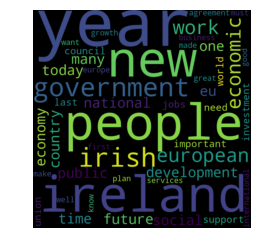

In [127]:
# wordcloud of top 50 words across all speeches
from wordcloud import WordCloud

top_50_words = [word[0] for word in all_words.most_common(50)]

top_50_words_string = ""

for word in top_50_words:
    top_50_words_string += (word + " ")
    
print(top_50_words_string)

# Create the wordcloud object
wordcloud = WordCloud(width=960, height=960, margin=0).generate(top_50_words_string)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [128]:
def find_word(word):
    word_count = []
    word_count2 = []
    print("1997 %s appears %d times. %.3f" % (word, all_words_1997[word], (all_words_1997[word]/len(all_words_1997)*10000)))
    print("1998 %s appears %d times. %.3f" % (word, all_words_1998[word], (all_words_1998[word]/len(all_words_1998)*10000)))
    print("1999 %s appears %d times. %.3f" % (word, all_words_1999[word], (all_words_1999[word]/len(all_words_1999)*10000)))
    print("2000 %s appears %d times. %.3f" % (word, all_words_2000[word], (all_words_2000[word]/len(all_words_2000)*10000)))
    print("2001 %s appears %d times. %.3f" % (word, all_words_2001[word], (all_words_2001[word]/len(all_words_2001)*10000)))
    print("2002 %s appears %d times. %.3f" % (word, all_words_2002[word], (all_words_2002[word]/len(all_words_2002)*10000)))
    print("2003 %s appears %d times. %.3f" % (word, all_words_2003[word], (all_words_2003[word]/len(all_words_2003)*10000)))
    print("2004 %s appears %d times. %.3f" % (word, all_words_2004[word], (all_words_2004[word]/len(all_words_2004)*10000)))
    print("2005 %s appears %d times. %.3f" % (word, all_words_2005[word], (all_words_2005[word]/len(all_words_2005)*10000)))
    print("2009 %s appears %d times. %.3f" % (word, all_words_2009[word], (all_words_2009[word]/len(all_words_2009)*10000)))
    print("2010 %s appears %d times. %.3f" % (word, all_words_2010[word], (all_words_2010[word]/len(all_words_2010)*10000)))
    print("2011 %s appears %d times. %.3f" % (word, all_words_2011[word], (all_words_2011[word]/len(all_words_2011)*10000)))
    print("2012 %s appears %d times. %.3f" % (word, all_words_2012[word], (all_words_2012[word]/len(all_words_2012)*10000)))
    print("2014 %s appears %d times. %.3f" % (word, all_words_2014[word], (all_words_2014[word]/len(all_words_2014)*10000)))
    print("2015 %s appears %d times. %.3f" % (word, all_words_2015[word], (all_words_2015[word]/len(all_words_2015)*10000)))
    print("2016 %s appears %d times. %.3f" % (word, all_words_2016[word], (all_words_2016[word]/len(all_words_2016)*10000)))
    print("2017 %s appears %d times. %.3f" % (word, all_words_2017[word], (all_words_2017[word]/len(all_words_2017)*10000)))
    print("2018 %s appears %d times. %.3f" % (word, all_words_2018[word], (all_words_2018[word]/len(all_words_2018)*10000)))
    word_count.append(all_words_1997[word])
    word_count.append(all_words_1998[word])
    word_count.append(all_words_1999[word])
    word_count.append(all_words_2000[word])
    word_count.append(all_words_2001[word])
    word_count.append(all_words_2002[word])
    word_count.append(all_words_2003[word])
    word_count.append(all_words_2004[word])
    word_count.append(all_words_2005[word])
    word_count.append(all_words_2009[word])
    word_count.append(all_words_2010[word])
    word_count.append(all_words_2011[word])
    word_count.append(all_words_2012[word])
    word_count.append(all_words_2014[word])
    word_count.append(all_words_2015[word])
    word_count.append(all_words_2016[word])
    word_count.append(all_words_2017[word])
    word_count.append(all_words_2018[word])
    word_count2.append((all_words_1997[word]/len(all_words_1997)*100))
    word_count2.append((all_words_1998[word]/len(all_words_1998)*100))
    word_count2.append((all_words_1999[word]/len(all_words_1998)*100))
    word_count2.append((all_words_2000[word]/len(all_words_2000)*100))
    word_count2.append((all_words_2001[word]/len(all_words_2001)*100))
    word_count2.append((all_words_2002[word]/len(all_words_2002)*100))
    word_count2.append((all_words_2003[word]/len(all_words_2003)*100))
    word_count2.append((all_words_2004[word]/len(all_words_2004)*100))
    word_count2.append((all_words_2005[word]/len(all_words_2005)*100))
    word_count2.append((all_words_2009[word]/len(all_words_2009)*100))
    word_count2.append((all_words_2010[word]/len(all_words_2010)*100))
    word_count2.append((all_words_2011[word]/len(all_words_2011)*100))
    word_count2.append((all_words_2012[word]/len(all_words_2012)*100))
    word_count2.append((all_words_2014[word]/len(all_words_2015)*100))
    word_count2.append((all_words_2015[word]/len(all_words_2016)*100))
    word_count2.append((all_words_2016[word]/len(all_words_2017)*100))
    word_count2.append((all_words_2017[word]/len(all_words_2018)*100))
    print(word_count)
    print(word_count2)
#find_word("bailout")
#find_word("anglo")
#find_word("recapitalisation")
# find_word("luas")
# find_word("tunnel")
# find_word("broadband")
# find_word("ceasefire")
#
#find_word("terrorist")
#find_word("housing")
#find_word("marriage")
#find_word("boom")
#find_word("abuse")
#find_word("election")
find_word("backstop")
find_word("peace")

1997 backstop appears 0 times. 0.000
1998 backstop appears 0 times. 0.000
1999 backstop appears 0 times. 0.000
2000 backstop appears 0 times. 0.000
2001 backstop appears 0 times. 0.000
2002 backstop appears 0 times. 0.000
2003 backstop appears 0 times. 0.000
2004 backstop appears 0 times. 0.000
2005 backstop appears 0 times. 0.000
2009 backstop appears 0 times. 0.000
2010 backstop appears 0 times. 0.000
2011 backstop appears 0 times. 0.000
2012 backstop appears 1 times. 1.506
2014 backstop appears 1 times. 1.160
2015 backstop appears 0 times. 0.000
2016 backstop appears 0 times. 0.000
2017 backstop appears 0 times. 0.000
2018 backstop appears 9 times. 11.397
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 9]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015062509414068384, 0.009380863039399626, 0.0, 0.0, 0.0]
1997 peace appears 9 times. 65.693
1998 peace appears 171 times. 183.772
1999 peace appears 81 times. 84.986
2000 peace appears 85 times. 98.402
2001 peace ap

# historical events
## luas opening
## ceasefire late nineties 2002 threathened
## brexit
## abortion
## terrorist
## tribunals
## housing
## unemployemt
## marriage



In [131]:

output_notebook()
year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018]
unemployment = [0, 24, 42, 44, 15, 17, 19, 10, 35, 3, 4, 8, 25, 44, 68, 29, 12, 11]
q = figure()
q.line(year, unemployment,  legend="unemployment", color="red")

#q.line(year, growth,  legend="growth", color = "green")

show(q)

NameError: name 'output_notebook' is not defined

# Gov doesnt like to talk about unemployment when it's high but talks a lot about it when it's low

In [132]:

output_notebook()
year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018]
emigration = [0.0, 0.08596604341285193, 0.1182033096926714, 0.09260331056835282, 0.14840182648401826, 0.1245674740484429, 0.11245431543435479, 0.03273322422258593, 0.04943968358602505, 0.027225701061802342, 0.0, 0.044836347332237333, 0.06024096385542169, 0.0, 0.009379983116030392, 0.06173474637308365, 0.01938172303517783, 0.05064573309698658]
immigration = [0.0, 0.02149151085321298, 0.06447453255963895, 0.06945248292626462, 0.0684931506849315, 0.06920415224913494, 0.028113578858588697, 0.08183306055646482, 0.05767963085036256, 0.04083855159270351, 0.0, 0.029890898221491553, 0.030120481927710847, 0.0, 0.02813994934809117, 0.08231299516411153, 0.08721775365830023, 0.07596859964547988]
growth = [0.6564551422319475, 0.9563722329679777, 0.8596604341285192, 1.0649380715360575, 0.6050228310502284, 0.5397923875432525, 0.7590666291818948, 1.309328968903437, 1.441990771259064, 0.7759324802613667, 1.2520638414969731, 1.150799581527425, 2.6656626506024095, 0.09278589654372535, 0.7597786323984617, 1.6153925300956888, 0.7655780598895242, 0.7470245631805521]
q = figure()
q.line(year, emigration,  legend="emigration", color="red")
q.line(year, immigration,  legend="immigration", color = "blue")
#q.line(year, growth,  legend="growth", color = "green")

show(q)

NameError: name 'output_notebook' is not defined

# Scrape dates

In [ ]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Taoiseach's_Speeches/?pageNumber="
count = 1
for page in range(1,38):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    dates = soup.find_all("span",{"class":"newsDate"})
    years = soup.find_all("span",{"class":"newsYear"})
    for date, year in zip(dates, years):
        date = re.split('(\d+)', date.text)
        date = date[1] + " " + date[2] + " " + year.text
        print(date)

In [ ]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()
year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
no_of_speeches = [11, 74, 77, 73, 65, 73, 34, 30, 152, 0, 0, 2, 41, 46, 38, 44, 368]
q = figure()
q.circle(year, no_of_speeches, size = 20, alpha = 0.4)

show(q)

In [ ]:

year = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18"]
brexit = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  4, 114, 225, 73]

p = figure(x_axis_label = "Year", x_range = year, title = "Occurences of Brexit", plot_height = 200)
p.vbar(x = year, top = brexit, width = 0.9,)
       
show(p)

In [ ]:
# Occurences of Brexit as a % of all words of that year
year = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18"]
brexit = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0.006, 0.195, 0.401, 0.167]

p = figure(x_axis_label = "Year", x_range = year, title = "Occurences of Brexit", plot_height = 200)
p.vbar(x = year, top = brexit, width = 0.9,)
       
show(p)

In [ ]:
# Occurences of the word recession
year = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "09", "10", "11", "12", "14", "15", "16", "17", "18"]
recession = [0, 0, 1, 2, 0, 0, 0, 1, 0, 21, 21, 2, 1, 10, 33, 1, 3, 3]

p = figure(x_axis_label = "Year", x_range = year, title = "Occurences of recession", plot_height = 200)
p.vbar(x = year, top = recession, width = 0.9,)
       
show(p)

In [ ]:
# Occurences of the word recession % 0f total words
year = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "09", "10", "11", "12", "14", "15", "16", "17", "18"]
recession = [0, 0, recession_1999, recession_2000, 0, 0, 0, recession_2004, 0, recession_2009, recession_2010, recession_2011, recession_2012, recession_2014, recession_2015, recession_2016, recession_2017, recession_2018]

p = figure(x_axis_label = "Year", x_range = year, title = "Occurences of recession", plot_height = 200)
p.vbar(x = year, top = recession, width = 0.9,)
       
show(p)

In [ ]:
#recession
output_notebook()
year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018]
recession = [0, 0, 1, 2, 0, 0, 0, 1, 0, 21, 21, 2, 1, 10, 33, 1, 3, 3]
recovery = [0, 4, 2, 3, 7, 4, 4, 6, 6, 46, 54, 35, 79, 140, 280, 105, 27, 1]
growth = [9, 89, 80, 92, 53, 39, 54, 80, 175, 57, 91, 77, 177, 81, 157, 79, 59, 56]
investment = [2, 96, 107, 139, 70, 100, 66, 78, 143, 86, 107, 40, 109, 132, 181, 130, 142, 104]
brexit = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 114, 225, 63]
q = figure()
q.line(year, recession,  legend="recession", color="red")
q.line(year, recovery,  legend="recovery", color = "blue")
q.line(year, growth,  legend="growth", color = "green")
q.line(year, investment,  legend="investment", color = "orange")
q.line(year, brexit,  legend="brexit", color = "brown")

show(q)

In [ ]:
#recovery
output_notebook()
year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018]
recovery = [0, 4, 2, 3, 7, 4, 4, 6, 6, 46, 54, 35, 79, 140, 280, 105, 27, 1]
recovery2 = [0, 4.298, 2.098, 3.473, 7.991, 5.536, 5.623, 9.820, 4.944, 62.619, 74.298, 52.309, 118.976, 162.375, 262.64, 108.036, 26.165, 1.266]
q = figure()
q.line(year, recovery,  legend="r", color="red")
q.line(year, recovery2,  legend="r2", color = "blue")
show(q)


In [ ]:
# pos_words = "ABLE, ACCEPT , ACCEPTANCE , ACCEPTABLE , ACCEPTED , ACCEPTING, ACTION, ACTIVATE, ACTIVE, ADD, ADDITION, ADORABLE, ADVANTAGE, AFFIRM, AGELESS, AGREE, AGREEABLE, AID, AIM, ABUNDANCE, ACCOUNTABILITY, ACCOMPLISHMENT , ACCOMPLISH, ACCURACY, ACHIEVEMENT , ACHIEVE, ACKNOWLEDGEMENT, ADAPTABILITY, ADVENTURE , ADVENTUROUS, AGILITY, ALERTNESS, AMBITION, ANTICIPATION, APPRECIATE , APPRECIATION , APPRECIATIVE , APPRECIATIVENESS, ASSERTIVENESS , ASSERTIVE, ATTENTIVENESS, AUDACITY, AWARE , AWARENESS, AUTHENTIC , AUTHENTICITY, ABRACADABRA, ATTRACTION, ALLOW , ALLOWING, AFFECTION , AFFECTIONATE, ABSORBED, ALERT, AMAZED, AWE , AWED, ANIMATE , ANIMATED , ANIMATING , ANIMATION, ANIMATENESS, ARDENT, AMAZING, AWESOME – AWESOMENESS, AROUSED, ASTONISHED – ASTONISHING, AMUSED, AIR – AIRNESS, ALOHA, ADORE, ADMIRE, ADMIRABLE, ALLURE, ANGEL – ANGELIC, ALTRUISM – ALTRUISTIC, ABOUND – ABOUNDING – ABOUNDS- ABUNDANT, ABSOLUTE – ABSOLUTELY, ACCESSIBLE, ACCLAIMED, ACCOMMODATE – ACCOMMODATED – ACCOMMODATION – ACCOMMODATING, AMPLE, APPRECIATIVE JOY, AMIN, ACCENTUACTIVITY, ACTABILITY, AFFABLE, ALACRITY, ALTRUCAUSE, AMIABLE, ASTOUNDING, ATTRACTIVE, ALIVE , ALIVENESS, ACCLAIM, ACCLAMATION, ACCOMPLISHED, ACCOMPLISHMENTS, ACCURATE, ACCURATELY, ACHIEVABLE, ACHIEVEMENTS, ACTION FOR HAPPINESS, ACTIVE AND CONSTRUCTIVE STEPS, ACTS OF KINDNESS, ADAPTABLE, ADAPTIVE, ADEQUATE, ADMIRABLY, ADMIRATION, ADMIRED, ADORED, ADORING, ADORINGLY, ADVANCED, ADVANTAGEOUS, ADVANTAGEOUSLY, ADVANTAGES, AFFABILITY, AFFABLY, AFFINITY, AFFIRMATION, AFFIRMATIVE, AFFLUENCE, AFFLUENT, AFFORD, AFFORDABLE, AFFORDABLY, AGILE, AGILELY, AGREEABLENESS, AGREEABLY, ALIGNED, ALLURING, ALLURINGLY, ALTRUISTICALLY, AMAZE, AMAZEMENT, AMAZES, AMAZINGLY, AMIABILITY, AMICABILITY, AMICABLE, AMICABLY, AMUSING, APPEAL, APPEALING, APPLAUD, APPRECIABLE, APPRECIATED, APPRECIATES, APPRECIATION OF BEAUTY, APPRECIATIVELY, APPROPRIATE, APPROVAL, APPROVE, ARDOR, ART OF APPRECIATION, ART OF STILLNESS, ART OF WELL-BEING, ASSURANCE, A REASON FOR BEING, ACARONAR, ACCOMMODATIVE, ALTITUDINARIAN,  AMIABLY, ACCOLADE, ACUMEN, ADJUSTABLE, ADMIRER, ADMIRING, ADMIRINGLY, ADORER, ADROIT, ADROITLY, ADULATED, ADULATION, ADULATORY, ADVENTURESOME, ADVOCATED, AMBITIOUS, AMBITIOUSLY, AMELIORATE, AMENITY, AMITY, AMPLY, AMUSE, AMUSINGLY, APOTHEOSIS, ASSUME YOUR OWN VALUE, ASTONISHINGLY, ASTONISHMENT,  AWAKEN, AWAKENING,  AURORA, BEATIFY, BEATITUDE, BENEFICIAL, BENEFIT, BENEVOLENT, BELOVED, BEST, BETTER, BLESS , BLESSING , BLESSED, BLISS , BLISSFULNESS , BLISSFUL, BLOOM, BLOSSOM, BALANCE , BALANCED, BEAUTY , BEAUTIFUL , BEAUTIFULLY, BELONG , BELONGING, BOLDNESS, BRAVERY, BRILLIANCE , BRILLIANT,  BIOPHILIA, BRIGHT , BRIGHTEN, BRIGHTNESS, BALISTIC, BLASTING, BLAZING, BLINDING, BREATHTAKING, BUBBLING, BUSTING, BLISSCIPLINE, BUYANCY, BULLISHNESS, BRISKNESS, BUOYANCY, BREEZINESS, BRIO,  BEAUTIFY,  BENEFACTOR, BENEFITS, BENEVOLENCE, BENEVOLENTLY,   BEYOND, BEAUTY IN ALL THINGS, BEINGNESS, BELIEVABLE, BLOOD-BROTHERS,  BADASSERY, BEST-SELLING,  BETTER-KNOWN,  BLITHESOME, BLOSSOMING, BONUS, BLING, BUDO, BLASTING LOVE, BUDDHAHOOD, CARE – CARING, CALM, CREATE, CREATIVE , CREATIVITY – CREATIVENESS , CAPABLE – CAPABILITY – CAPABLY, CELEBRATE – CELEBRATION, CERTAIN – CERTAINTY, CHARITABLE – CHARITY, CHARM – CHARMING – CHARMER, CHOICE, CLEAN , CLEANLINESS, COMFORT , COMFORTABLE ,COMFORTING, CUDDLE , CUDDLING, CANDOR, CAREFULNESS, CHALLENGE, CHANGE, CHEERFUL , CHEERFULNESS, CLARITY, COLLABORATION, COMMITMENT, COMMUNICATION, COMMUNITY, COMPASSION , COMPASSIONATE, COMPETENT , COMPETENCE – COMPETENCY, CONCENTRATION, CONFIDENT , CONFIDENCE, CONSCIOUSNESS, CONSISTENCY , CONSISTENT, CONTENT , CONTENTMENT, CONTINUITY , CONTINUOUS, CONTRIBUTION, CONVICTION , CONVINCING, COOPERATION, COURAGE, COURTESY , COURTEOUS, CURIOUS , CURIOSITY, CHAKRA, COOL, CLEAR HEADED, CENTERED, CLOSENESS, COMPANIONSHIP, CONSIDERATE – CONSIDERATION, COMMUNION, CONNECT – CONNECTED – CONNECTION – CONNECTEDNESS, CONQUER, CUTE, CHARISMA – CHARISMATIC, COLLECTED, CHEERFUL WILLINGNESS, CHEERS, CONGRUENCE, CORDIAL, CAPITAL, CORKING, CLEAR, CARESS, CHEERFUL MOOD,  CONTENTED, COZINESS, CUTENESS, CAREFREENESS, CAREFREE, CENTERING, CENTERING MEDITATION, CITIZEN OF MASTERY, CO-CREATING, CO-CREATOR, COHESION, CONTINUAL STREAM OF SYNCHRONICITY, CREATIVE PROCESS, CREATIVE AFFIRMATIONS, COMPOSTURE, CONCORD, CEREBRO,  CHI, CLASSY, COPACABANA, COSMIC AWARENESS, DIRECTION, DELICATE, DECENT, DESIRABLE, DELICIOUS , DELICIOUSNESS, DO, DREAM – DREAMY, DYNAMIC, DARING, DECISIVENESS, DELIGHT – DELIGHTED – DELIGHTFUL, DEPENDABILITY, DESIRE, DETERMINATION, DEVOTION, DIGNITY, DILIGENCE, DISCIPLINE, DISCOVERY, DISCRETION, DIVERSITY, DRIVE, DUTY, DIVINE, DAZZLED, DISNEY, DEVOTED, DANDY, DAIMON, DEBONAIR, DETACHMENT, DEDICATED, DAUWTRAPPEN, DAZZLE, DELIGHTFULLY, DEFENCELESSNESS,  DESERVE, DESERVEDNESS, DESERVINGNESS, DIS-IDENTIFY, DOPE, EMPATHY , EMPATHIZE , EMPHATIC, EASY , EASILY , EASIER, EDUCATE , EDUCATION , EDUCATED, EFFICIENT, ENABLE , ENABLED, ENERGETIC – ENERGIZE – ENERGY, ENGAGE – ENGAGING , ENGAGED, ENJOY , ENJOYMENT, ENOUGH, EAGER , EAGERNESS, EFFECTIVENESS, EFFICIENCY, ELATION, ELEGANCE, ENCOURAGE , ENCOURAGEMENT – ENCOURAGED, ENDURANCE, EQUALITY, EXCELLENCE,– EXCELLENT, EXCITE, EXCITEMENT , EXCITED, EXPERIENCE, EXPERTISE, EXPLORATION, EXPRESSIVENESS , EXPRESSING, ENLIGHTENMENT , ENLIGHTENED, ETERNAL, EXALTATION, EMULATE, EMPOWER , EMPOWERING , EMPOWERED, EXPANSIVE, EXHILARATING, ENTHUSIASTIC , ENTHUSIASM, ENGROSSED, ENCHANTED, ENTRANCED, ECSTATIC, ELATED, ENTHRALLED, EXUBERANT , EXUBERANCE, EXPECTANT, EQUANIMOUS, ENLIVENED, EFFICACY, EASE, EXEMPLARY, EXTRAORDINARY, EARNEST, ELEVATE – ELEVATED, EQUANIMITY, EASE-OF-MIND, EXCITED ANTICIPATION, EXTRA, EQUITY , EQUITABLY , EQUITABLE, ECSTATIFY, EUDAEMONISM, EUDAEMONIST, EUDAEMONISTIC, EUDAIMONIA, EUDAMONIA, EVOLVE, EXALTING, EXSTATISFY, EXULTANT, ASTRONOMICAL, CHAMPION, CHAMP’, ELECTRIC, ENORMOUS , EXCEPTIONAL, EXCITING, EXQUISITE, EFFORTLESSNESS, EUNOIA, ECOSOPHY, EBULLIENCE, EMBRACE,   ERLEBNIS,  EFFORTLESSLY, EKAGGATA,  EARTHING, EVER-JOYOUS,  ETHEREAL, ENDLESS, FANTASTIC,  FLOW , FLOWING, FABULOUS, FAIR, FAITH, FAITHFUL, FAME, FAVORITE, FAIRNESS, FAMILY, FIDELITY, FLEXIBILITY, FOCUS, FLOURISH, FORGIVE – FORGIVING – FORGIVENESS, FORTITUDE, FREE , FREEDOM, FRUGALITY, FUN, FUTURE, FRIEND , FRIENDLY , FRIENDSHIP , FRIENDLINESS, FASCINATE , FASCINATED, FULFILL , FULFILLED, FOOD, FEISTY , FEISTINESS, FEASIBLE, FINE, FEARLESS, FESTIVE , FESTIVENESS, FIT, FANTABULOUS, FREECYCLE, FUNERIFIC, FUNOLOGY, FLAWLESS, FAMOUS, FANCY, FLASHY, FTW, FUNNY JOKES, FLAUNTING, FONDLE, FRIC-TIONLESSLY, FLAWLESSLY, FLOURISHING, FORTUITOUS, FUN-LOVING, FREE-SPIRITED, FELICITY, GLOW, GENEROUS – GENEROSITY, GENERATE, GENIAL, GENIUS, GENUINE, GIFT, GIVE ,GIVING, GOOD, GOODNESS,  GRACE, GRATITUDE, GRATEFULNESS, GROW , GROWTH, GUIDE , GUIDING , GUIDANCE, GOD, GROUNDED, GLORY, GODLINESS,  GROOVY, GIDDY, GLAD,  GLAMOR, GIGGLING, GODDESS, GORGEOUS , GORGEOUSNESS, GRANDIOSITY, GENERAVITY, GENTLEMAN, GARGANTUAN, GRAND, GREAT, GINGER, GOOD-HUMORED, GOODWILL, GREATFUL, GEMUTLICHKEIT, GIBIGIANA, GIGIL, GOOD INDWELLING SPIRIT, GOOD-HUMORED, GOODWILL,  GAME-CHANGER, GENERATOR OF LIFE, GRACEFULLY, GRACIOUSNESS, GOLDILOCKS, GENUINENESS, GREAT ZEAL, GOOD DONE IN SECRET, HOPE , HOPEFULNESS, HAPPINESS , HAPPY , HAPPILY, HARMONIOUS , HARMONIZE , HARMONY, HEALTH , HEALTHY, HEART, HELLO, HELP , HELPFUL , HELPING, HOT , HONEST , HONESTY, HUMAN, HUMOR, HELPFULNESS, HERO , HEROISM, HOLY , HOLINESS, HONOR, HOSPITALITY, HUMBLE, HEAVEN , HEAVENLY, HALO, HEARTFELT, HEARTWARMING, ONE-POINTEDNESS, HAPPY HEARTED, HEEDFUL, HANDSOME, HUGE, HIGH-SPIRITEDNESS,  HEART-OPENING, HOSPITABLE, HUMAN FLOURISHING, HIGHLY DISTINGUISHED, HARNESS, HEIGHTENED, HOLISTIC, HOLY SPIRIT, HALL OF AWESOMENESS, HONEY BADGER,  HALYCON, HABITUATION,  IMAGINATION, INSPIRE , INSPIRATION , INSPIRED , INSPIRATIONAL,  IDEA, INCREDIBLE, INNOVATE , INNOVATION, INTERESTING – INTEREST – INTERESTED, IMPROVEMENT, INDEPENDENCE, INFLUENCE, INGENUITY, INNER PEACE, INSIGHT – INSIGHTFULNESS – INSIGHTFUL, INTEGRITY, INTELLIGENCE – INTELLIGENT, INTENSITY, INTIMACY, INTUITIVENESS, INVENTIVENESS, INVESTING, INTENTION, INVIGORATE – INVIGORATED, INTRIGUED, INVOLVE – INVOLVED, INCLUSION, INNOCENT, INEFFABLE – INEFFABILITY, INTREPID, IDEALISM, ILLUMINATION – ILLUMINATED, INCOMPARABLE, INVINCIBLE, INQUISITIVE, INFINITE, INFINITY, ILLUSTRIOUS, INNER, ICHARIBA CHODE, IKIGAI, INCREDIBLE CUTENESS, INDWELLING,  IRIDESCENT, ILLUSTRIOUS, INNER,  INTERCONNECTED, INTERCONNECTIVITY, INTUITION, INCLUSIVENESS,JOY , JOYFUL , JOYOUS, JOKE, JOLLY, JOVIAL, JUST, JUSTICE, JUBILANT, JUVENESCENT, JUMPY, JAMMIN, JUBILINGO, KINDNESS , KIND ,KIND-HEART , KINDLY, KEEP-UP, KISS, KNOWLEDGE, KITTENS, KEEN, KAAJHUAB, KALON, KILIG,  LIKE, LAUGH , LAUGHING, LEARN , LEARNING, LIFE, LIVE – LIVING, LUXURY, LONGEVITY, LOYALTY – LOYAL, LOVE – LOVABLE – LOVING, LIBERTY, LOGIC, LEADER , LEADERSHIP, LUCK , LUCKY, LIGHT,  LIVELY,  LOVELY,  LIGHTWORKER, LEADING,  LUSTROUS,  LIGHT-HEARTED, LEEWAY,  LIVELINESS, MEANING , MORE, MAGNIFICENT, MAJESTY, MANY, MARVELOUS, MERIT, MOTIVATE, MIRACLE, MAGIC, MASTERY, MATURITY, MINDFUL – MINDFULNESS, MODESTY, MOTIVATION – MOTIVATIONAL, MERCY, MEDITATION, MIND-BLOWING, MELLOW, MOVED, MOVEMENT, MUTUALITY, MOURNING, MELIORISM, MENCH, MINDSIGHT, MINDSIGHT, MAJOR, MILD, MEANINGFUL, MEMORABLE, MORPHING, MOTIVATED, MOVING,  MIRTHFUL, MYRIAD, MOJO, NOBLE, NURTURING , NURTURE, NON-RESISTANCE , NON-RESISTANT, NEW, NICE, NIRVANA, NEAT,  NOURISH , NOURISHED , NOURISHING , NOURISHMENT, NAMASTE, NEOTENY,  NOVATURIENT, NON-DUALITY,OPTIMIST , OPTIMISTIC, OUTSTANDING, OK, ON, ONWARDS, OPEN , OPENLY , OPENING, OPEN-MINDED, OPPORTUNITY, ORIGINAL, OPENNESS, OPTIMISM, ORDER, ORGANIZATION, ORIGINALITY, OUTCOME, ORIENTATION, OBEDIENT,  OMG, OVERCOME,  OUTGOING, ONENESS, OUTERNATIONALIST,  ORENDA,  OMNISCIENCE,  PERFECT , PERFECTION,  PEACE , PACIFY, PARADISE , PARADISIAC, PASSION , PASSIONATE, PLEASE, PURE, PERCEPTIVENESS, PERSEVERANCE, PERSISTENCE,  PLEASURE,  POWER , POWERFUL, PRACTICALITY, PRECISION, PREPAREDNESS, PRESENCE, PRESERVATION, PRIVACY, PROACTIVITY , PROACTIVE, PROGRESS, PROSPERITY,  PROSPEROUS, PUNCTUALITY , PUNCTUAL, PATIENCE, PROUD, PLEASED, PLAY – PLAYFUL – PLAYFULNESS, PARTICIPATION, PURPOSE, PICK-ME-UP, PRONIA, PIOUS, PUPPIES, POLITE, POSITIVE MIND, POSITIVE THINKING, PRETTY, PRECIOUS, PARDON, PERKINESS, PIQUANCY, POSICHOICE, POSIDRIVING, POSIFIT, POSILENZ, POSIMASS, POSIMINDER, POSIRATIO, POSIRIPPLE, POSIRIPPLER, POSIRIPPLES, POSISINGER, POSISITE, POSISTRENGTH, POSITIBILITARIAN, POSITRACTION, POSITUDE, POSIVALUES, POSIWORD, POSSIBILITARIAN, PROMPTNESS, PROTO, PRICELESS, PEP – PEPPINESS, PERMALICIOUS, PLUCKY, POLLYANNAISM, PRIDE, PETRICHOR, PHILOCALIST,  PROTECT, POLITENESS,  PRIVILEGE, PROPITIOUS,  PICTURESQUE, PRANA, PANACHE, QUALITY, QUIET , QUIETNESS, QUAINT, QUIESCENT, QUEENLY, QUICKENING, QUIDDITY,   QUANTUMNESS,  RESPECT, RADIANT, READY , READINESS, REAL , REALITY, REASON, RECOMMEND, REFRESH – REFRESHED, RELAX – RELAXED, RELIEF, RELIEVE – RELIEVED, REMARKABLE, RATIONALITY, RECOGNITION, RELATIONSHIPS, RELIABLE – RELIABILITY, RELIGION, RESOURCEFULNESS, RESPONSIBILITY, RIGHTEOUSNESS, RISK-TAKING, ROMANCE, REVELATION, REVIVED, RESTORE – RESTORED, REST – RESTED, RENEW – RENEWED, REJUVENATE – REJUVENATED, RAPTURE – RAPTUROUS, RESILIENT – RESILIENCE, REVERENCE, RIPE, REBORN, RELATEDNESS, RASASVADA, REPOSE, ROSINESS, RELENT, RENOWNED, RESPECTED, RAINBOW, ROMANTIC, RELENT, RENOWNED, RADIATE, RECOGNIZE, RELEASING, RIGHTFUL, ROCKSTAR, SCOPE, SMILE – SMILING, SOULMATE, SOUL – SOULFUL, SACRED, SAFE – SAFETY, SECURE – SECURED – SECURITY, SUSTAIN – SUSTAINED, SAVE, SAVINGS, SIMPLE – SIMPLIFY, SELFLESSNESS, SELF-ESTEEM, SERVICE, SIMPLICITY, SINCERITY, SKILL – SKILLED, SPIRIT, SERENE – SERENITY, STABILITY, STRENGTH, STYLE, SYSTEMATIZATION, SELF-LOVE, STRIVE, SALVATION, SELF-RESPECT, SELF-FORGIVENESS, SERVE, SYMPATHETIC, SELF-COMPASSION, SELF-KINDNESS, SPELLBOUND, STIMULATED – STIMULATING – STIMULATION, SATISFIED, STILL, SURPRISED, SLEEP, SEXUAL EXPRESSION, SHELTER, SELF-EXPRESSION, SPACE – SPACIOUS, SPONTANEITY – SPONTANEOUS, SUNSHINE, SPARK, SPARKLE , SPARKLES, SWEET , SWEETNESS, SUPPORT, SUPPORTING , SUPPORTED, SEXY , SEXINESS, SUPREME, SUCCULENT, SWEETHEART, STUDY – STUDIOUS, SAVOUR – SAVOURING, SUFFICIENT, STUPENDOUS, SWAG , SWAGGY, SPLENDID, SMART, SPECTACULAR, SPECIAL, SERENDIPITY, SYNERGY,  START, STEADFASTNESS, SUBLIME, SUNNINESS, SUPERPOWER, SPUNKY, STELLAR, SUPERCHARGE, SUPERCHARGED,  SYNCHRONICITY, SASSY, SUPERCALIFRAGILISTIC, SUPERCALIFRAGILISTICEXPIALIDOCIOUS, TRUE, TRUST , TRUSTING , TACT, TEACH – TEACHABLE, TEAM, THANKFUL, THANK ,THANKFULNESS, THERAPY, TIME, TEAMWORK, TIMELINESS, TOLERANCE, TRADITION, TRANQUIL , TRANQUILITY, TRUTH , TRUTHFULNESS, TENDER, THRILLED, TOUCH , TOUCHED, TICKLED,  TRANSFORMATIVE , TRANSFORMATION , TRANSFORM, TRIUMPH, THRIVE , THRIVING, TENACITY, TRANSPARENT, TEMUL, TENDERLY, TIDSOPTIMIST, UNIFICATION, UNIQUE, UPLIFT, ULTIMATE, UNCONDITIONAL, UPGRADE, USEFUL, USER-FRIENDLY, UNITY, UNDERSTAND , UNDERSTANDING ,UNDERSTOOD, UPSKILL, UNBELIEVABLE, UNFLAPPABLE, UNREAL, UNABASHED,   UNHURRY, UNBELIEVABLE, UNFLAPPABLE, UNREAL, VITALITY, VALUE – VALUES – VALUABLE, VIRTUOUS, VALID, VERIFY, VERY, VIABLE, VIRTUE, VICTORY , VICTORIOUS, VARIETY, VULNERABILITY ,VULNERABLE, VIBRANT, VOW, VIM, VIGOR, VENERATION, VOCABULEVERAGE, VERSATILITY, UBUNTU, WORTH – WORTHY – WORTHINESS, WEALTH, WARM – WARMTH, WELCOME,  WILLING , WILLINGNESS , WISDOM, WISE, WON, WONDERFUL,  WHOLEHEARTEDNESS, WOW, WONDER, WATER, WELL, WELLNESS, WELFARE, WHOLE,  WIN , WINNABLE , WINNING, WALWALUN, WHOLEHEARTEDLY,  WONDROUS, WANDERLUST, XO, XENODOCHIAL, XFACTOR, XENOPHILE, XENIAL, YES, YOUTH, YOUTHFUL, YOUNG, YIPPEE, YAY, YEARN, YEA, YEAH, YUMMY, YEN, YESABILITY, YUGEN, YARAANA, YESABLE, ZEALOUS, ZEAL, ZEST, ZESTY, ZESTFUL, ZIPPY, ZING, ZAPPY, ZANY, ZAJEBISCIE"
# pos_words = pos_words.lower()
# pos_words = word_tokenize(pos_words)

# # remove all instances of ","
# pos_words = [word for word in pos_words if word != ","]
# pos_words = [word for word in pos_words if word != "–"]
# pos_words = [w for w in pos_words if not w in stop_words]

# #print("There are %s positive words" % len(pos_words))
# all_pos_words = [w for w in pos_words if w in speech_string_2010]
# print(len(all_pos_words))
# #print(all_pos_words)
# freq_pos_words = nltk.FreqDist(all_pos_words)
# print(len(freq_pos_words))
# print(freq_pos_words.most_common())

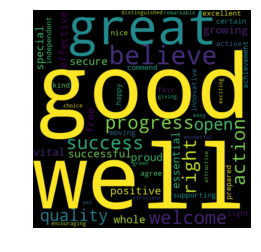

63
154
146
151
153
136
138
132
171
122
136
131
144
139
153
146
150
141


In [175]:
#pos words 2nd dataset
pos_words="absolutely,accepted,acclaimed,accomplish,accomplishment,achievement,action,active,admire,adorable,adventure,affirmative,affluent,agree,agreeable,amazing,angelic,appealing,approve aptitude attractive awesome,beaming,beautiful,believe,beneficial,bliss,bountiful,bounty,brave,bravo,brilliant,bubbly,calm,celebrated,certain,champ,champion,charming,cheery,choice,classic,classical,clean,commend,composed,congratulation,constant,cool,courageous,creative,cute,dazzling,delight,delightful,distinguished,divine,earnest,easy,ecstatic,effective,effervescent,efficient,effortless,electrifying,elegant,enchanting,encouraging,endorsed,energetic,energized,engaging,enthusiastic,essential,esteemed,ethical,excellent,exciting,exquisite,fabulous,fair,familiar,famous,fantastic,favorable,fetching,finefitting,flourishing,fortunate,free,fresh,friendly,fun,funny,generous,genius,genuine,giving,glamorous,glowing,good,gorgeous,graceful,great,green,grin,growing,handsome,happy,harmonious,healing,healthy,hearty,heavenly,honest,honorable,honored,hug,idea,ideal,imaginative,imagine,impressive,independent,innovate,innovative,instant,instantaneous,instinctive,intellectual,intelligent,intuitive,inventive,jovial,joy,jubilant,keen,kind,knowing,knowledgeable,laugh,learned,legendary,light,lively,lovely,lucid,lucky,luminous,marvelous,masterful,meaningful,merit,meritorious,miraculous,motivating,moving,natural,nice,novel,now,nurturing,nutritious,okay,open,optimistic,paradise,perfect,phenomenal,pleasant,pleasurable,plentiful,poised,polished,popular,positive,powerful,prepared,pretty,principled,productive,progress,prominent,protected,proud,quality,quick,quiet,ready,reassuring,refined,refreshing,rejoice,reliable,remarkable,resounding,respected,restored,reward,rewarding,right,robust,safe,satisfactory,secure,seemly,simple,skilled,skillful,smile,soulful,sparkling,special,spirited,spiritual,stirring,stunning,stupendous,success,successful,sunny,super,superb,supporting,surprising,terrific,thorough,thrilling,thriving,tops,tranquil,transformative,transforming,trusting,truthful,unreal,unwavering,upupbeat,upright,upstanding,valued,vibrant,victorious,victory,vigorous,virtuous,vital,vivacious,wealthy,welcome,well,whole,wholesome,willing,wonderful,wondrous,worthy,wow,yes,yummy,zeal,zealous"
pos_words = word_tokenize(pos_words)

# remove all instances of ","
pos_words = [word for word in pos_words if word != ","]
pos_words = [w for w in pos_words if not w in stop_words]

#print("There are %s positive words" % len(pos_words))


all_words = word_tokenize(all_speeches_string)

all_words = [w for w in all_words if not w in stop_words]


all_pos_words = [w for w in all_words if w in pos_words]

freq_pos_words = nltk.FreqDist(all_pos_words)

top_50_pos_words = [word[0] for word in freq_pos_words.most_common(50)]

top_50_pos_words_string = ""

for word in top_50_pos_words:
    top_50_pos_words_string += (word + " ")
    

# Create the wordcloud object
wordcloud = WordCloud(width=960, height=960).generate(top_50_pos_words_string)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

all_pos_words_1997 = [w for w in pos_words if w in speech_string_1997]
print(len(all_pos_words_1997))
all_pos_words_1998 = [w for w in pos_words if w in speech_string_1998]
print(len(all_pos_words_1998))
all_pos_words_1999 = [w for w in pos_words if w in speech_string_1999]
print(len(all_pos_words_1999))
all_pos_words_2000 = [w for w in pos_words if w in speech_string_2000]
print(len(all_pos_words_2000))
all_pos_words_2001 = [w for w in pos_words if w in speech_string_2001]
print(len(all_pos_words_2001))
all_pos_words_2002 = [w for w in pos_words if w in speech_string_2002]
print(len(all_pos_words_2002))
all_pos_words_2003 = [w for w in pos_words if w in speech_string_2003]
print(len(all_pos_words_2003))
all_pos_words_2004 = [w for w in pos_words if w in speech_string_2004]
print(len(all_pos_words_2004))
all_pos_words_2005 = [w for w in pos_words if w in speech_string_2005]
print(len(all_pos_words_2005))
all_pos_words_2009 = [w for w in pos_words if w in speech_string_2009]
print(len(all_pos_words_2009))
all_pos_words_2010 = [w for w in pos_words if w in speech_string_2010]
print(len(all_pos_words_2010))
all_pos_words_2011 = [w for w in pos_words if w in speech_string_2011]
print(len(all_pos_words_2011))
all_pos_words_2012 = [w for w in pos_words if w in speech_string_2012]
print(len(all_pos_words_2012))
all_pos_words_2014 = [w for w in pos_words if w in speech_string_2014]
print(len(all_pos_words_2014))
all_pos_words_2015 = [w for w in pos_words if w in speech_string_2015]
print(len(all_pos_words_2015))
all_pos_words_2016 = [w for w in pos_words if w in speech_string_2016]
print(len(all_pos_words_2016))
all_pos_words_2017 = [w for w in pos_words if w in speech_string_2017]
print(len(all_pos_words_2017))
all_pos_words_2018 = [w for w in pos_words if w in speech_string_2018]
print(len(all_pos_words_2018))

In [ ]:
# neg_words = "abnormal, abolish, abominable, abominably, abominate, abomination, abort, aborted, aborts, abrade, abrasive, abrupt, abruptly, abscond, absence, absent-minded, absentee, absurd, absurdity, absurdly, absurdness, abuse, abused, abuses, abusive, abysmal, abysmally, abyss, accidental, accost, accursed, accusation, accusations, accuse, accuses, accusing, accusingly, acerbate, acerbic, acerbically, ache, ached, aches, aching, acrid, acridly, acridness, acrimonious, acrimoniously, acrimony, adamant, adamantly, addict, addicted, addicting, addicts, admonish, admonisher, admonishingly, admonishment, admonition, adulterate, adulterated, adulteration, adversarial, adversary, adverse, adversity, afflict, affliction, afflictive, affront, afraid, aggravate, aggravating, aggravation, aggression, aggressive, aggressiveness, aggressor, aggrieve, aggrieved, aghast, agonies, agonize, agonizing, agonizingly, agony, aground, ail, ailing, ailment, aimless, alarm, alarmed, alarming, alarmingly, alienate, alienated, alienation, allegation, allegations, allege, allergic, allergies, allergy, aloof, altercation, ambiguity, ambiguous, ambivalence, ambivalent, ambush, amiss, amputate, anarchism, anarchist, anarchistic, anarchy, anemic, anger, angrily, angriness, angry, anguish, animosity, annihilate, annihilation, annoy, annoyance, annoyances, annoyed, annoying, annoyingly, annoys, anomalous, anomaly, antagonism, antagonist, antagonistic, antagonize, anti-, anti-occupation, anti-proliferation, anti-social, anti-us, anti-white, antipathy, antiquated, antithetical, anxieties, anxiety, anxious, anxiously, anxiousness, apathetic, apathetically, apathy, apocalypse, apocalyptic, apologist, apologists, appall, appalled, appalling, appallingly, apprehension, apprehensions, apprehensive, apprehensively, arbitrary, arcane, archaic, arduous, arduously, argumentative, arrogance, arrogant, arrogantly, ashamed, asinine, asininely, askance, asperse, aspersion, aspersions, assail, assassin, assassinate, assault, astray, asunder, atrocious, atrocities, atrocity, atrophy, attack, attacks, audacious, audaciously, audaciousness, audacity, austere, authoritarian, autocrat, autocratic, avalanche, avarice, avaricious, avariciously, avenge, averse, aversion, awful, awfully, awfulness, awkward, awkwardness, ax, babble, back-logged, back-wood, back-woods, backache, backaches, backbite, backbiting, backward, backwardness, backwoods, bad, badly, baffle, baffled, bafflement, baffling, bait, balk, banal, bane, banish, banishment, bankrupt, barbarian, barbaric, barbarically, barbarity, barbarous, barbarously, barren, baseless, bash, bashed, bashful, bashing, battered, battering, batty, bearish, beastly, bedlam, bedlamite, befoul, beg, beggar, beggarly, begging, beguile, belabor, belated, beleaguer, belie, belittle, belittled, belittling, bellicose, belligerence, belligerent, belligerently, bemoan, bemoaning, bemused, bent, berate, bereave, bereavement, bereft, berserk, beseech, beset, besiege, besmirch, betray, betrayal, betrayals, betrayer, betraying, betrays, bewail, beware, bewilder, bewildered, bewildering, bewilderingly, bewilderment, bewitch, bias, biased, biases, bicker, bickering, bid-rigging, bigotries, bigotry, biting, bitingly, bitter, bitterly, bitterness, bizarre, blab, blabber, blackmail, blah, blame, blameworthy, bland, blandish, blaspheme, blasphemous, blasphemy, blasted, blatant, blatantly, blather, bleak, bleakly, bleakness, bleed, bleeding, bleeds, blemish, blind, blinding, blindingly, blindside, blister, blistering, bloated, blockage, blockhead, bloodshed, bloodthirsty, bloody, blotchy, blow, blunder, blundering, blunders, blunt, blur, blurred, blurring, blurry, blurs, blurt, boastful, boggle, bogus, boil, boiling, boisterous, bomb, bombard, bombardment, bombastic, bondage, bonkers, bore, bored, boredom, bores, boring, botch, bother, bothered, bothering, bothers, bothersome, bowdlerize, boycott, braggart, bragger, brainless, brainwash, brash, brashly, brashness, brat, bravado, brazen, brazenly, brazenness, breach, break, break-up, break-ups, breakdown, breaking, breaks, breakup, breakups, bribery, brimstone, bristle, brittle, broke, broken, broken-hearted, brood, browbeat, bruise, bruised, bruises, bruising, brusque, brutal, brutalities, brutality, brutalize, brutalizing, brutally, brute, brutish, buckle, bug, bugging, buggy, bugs, bulkier, bulkiness, bulky,  bull—-, bullies, bulls..t, bully, bullying, bullyingly, bum, bump, bumped, bumping, bumps, bumpy, bungle, bungler, bungling, bunk, burden, burdensome, burdensomely, burn, burned, burning, burns, bust, busts, busybody, butcher, butchery, buzzing, byzantine, cackle, calamities, calamitous, calamitously, calamity, callous, calumniate, calumniation, calumnies, calumnious, calumniously, calumny, cancer, cancerous, cannibal, cannibalize, capitulate, capricious, capriciously, capriciousness, capsize, careless, carelessness, caricature, carnage, carp, cartoonish, cash-strapped, castigate, castrated, casualty, cataclysm, cataclysmal, cataclysmic, cataclysmically, catastrophe, catastrophes, catastrophic, catastrophically, caustic, caustically, cautionary, cave, censure, chafe, chaff, chagrin, challenging, chaos, chaotic, chasten, chastise, chastisement, chatter, chatterbox, cheap, cheapen, cheaply, cheat, cheated, cheater, cheating, cheats, checkered, cheerless, cheesy, chide, childish, chill, chilly, chintzy, choke, choleric, choppy, chore, chronic, chunky, clamor, clamorous, clash, clique, clog, clogged, clogs, cloud, clouding, cloudy, clueless, clumsy, clunky, coarse, cocky, coerce, coercion, coercive, cold, coldly, collapse, collude, collusion, combative, combust, comical, commiserate, commonplace, commotion, commotions, complacent, complain, complained, complaining, complains, complaint, complaints, complex, complicated, complication, complicit, compulsion, compulsive, concede, conceded, conceit, conceited, concern, concerned, concerns, concession, concessions, condemn, condemnable, condemnation, condemned, condemns, condescend, condescending, condescendingly, condescension, confess, confession, confessions, confined, conflict, conflicted, conflicting, conflicts, confound, confounded, confounding, confront, confrontation, confrontational, confuse, confused, confuses, confusing, confusion, confusions, congested, congestion, cons, conservative, conspicuous, conspicuously, conspiracies, conspiracy, conspirator, conspiratorial, conspire, consternation, contagious, contaminate, contaminated, contaminates, contaminating, contamination, contempt, contemptible, contemptuous, contemptuously, contend, contention, contentious, contort, contortions, contradict, contradiction, contradictory, contrariness, contravene, contrive, contrived, controversial, controversy, convoluted, corrode, corrosion, corrosions, corrosive, corrupt, corrupted, corrupting, corruption, corrupts, costlier, costly, counter-productive, counterproductive, covetous, coward, cowardly, crabby, crack, cracked, cracks, craftily, crafty, cramp, cramped, cramping, cranky, crap, crappy, craps, crash, crashed, crashes, crashing, crass, craven, cravenly, craze, crazily, craziness, crazy, creak, creaking, creaks, credulous, creep, creeping, creeps, creepy, crept, crime, criminal, cringe, cringed, cringes, cripple, crippled, cripples, crippling, crisis, critic, critical, criticism, criticisms, criticize, criticized, criticizing, critics, cronyism, crook, crooked, crooks, crowded, crowdedness, crude, cruel, crueler, cruelest, cruelly, cruelness, cruelties, cruelty, crumble, crumbling, crummy, crumple, crumpled, crumples, crush, crushed, crushing, cry, culpable, culprit, cumbersome, curse, cursed, curses, curt, cuss, cussed, cutthroat, cynical, cynicism, damage, damaged, damages, damaging, damn, damnable, damnably, damnation, damned, damning, damper, danger, dangerous, dangerousness, dark, darken, darkened, darker, darkness, dastard, dastardly, daunt, daunting, dauntingly, dawdle, daze, dazed, dead, deadbeat, deadlock, deadly, deadweight, deaf, dearth, death, debacle, debase, debasement, debaser, debatable, debauch, debaucher, debauchery, debilitate, debilitating, debility, debt, debts, decadence, decadent, decay, decayed, deceit, deceitful, deceitfully, deceitfulness, deceive, deceiver, deceivers, deceiving, deception, deceptive, deceptively, declaim, decline, declines, declining, decrement, decrepit, decrepitude, decry, defamation, defamations, defamatory, defame, defect, defective, defects, defensive, defiance, defiant, defiantly, deficiencies, deficiency, deficient, defile, defiler, deform, deformed, defrauding, defunct, defy, degenerate, degenerately, degeneration, degradation, degrade, degrading, degradingly, dehumanization, dehumanize, deign, deject, dejected, dejectedly, dejection, delay, delayed, delaying, delays, delinquency, delinquent, delirious, delirium, delude, deluded, deluge, delusion, delusional, delusions, demean, demeaning, demise, demolish, demolisher, demon, demonic, demonize, demonized, demonizes, demonizing, demoralize, demoralizing, demoralizingly, denial, denied, denies, denigrate, denounce, dense, dent, dented, dents, denunciate, denunciation, denunciations, deny, denying, deplete, deplorable, deplorably, deplore, deploring, deploringly, deprave, depraved, depravedly, deprecate, depress, depressed, depressing, depressingly, depression, depressions, deprive, deprived, deride, derision, derisive, derisively, derisiveness, derogatory, desecrate, desert, desertion, desiccate, desiccated, desolate, desolately, desolation, despair, despairing, despairingly, desperate, desperately, desperation, despicable, despicably, despise, despised, despoil, despoiler, despondence, despondency, despondent, despondently, despot, despotic, despotism, destitute, destitution, destroy, destroyer, destruction, destructive, desultory, deter, deteriorate, deteriorating, deterioration, deterrent, detest, detestable, detestably, detested, detesting, detests, detract, detracted, detracting, detraction, detracts, detriment, detrimental, devastate, devastated, devastates, devastating, devastatingly, devastation, deviate, deviation, devil, devilish, devilishly, devilment, devilry, devious, deviously, deviousness, devoid, diabolic, diabolical, diabolically, diametrically, diatribe, diatribes, dick, dictator, dictatorial, die, die-hard, died, dies, difficult, difficulties, difficulty, diffidence, dilapidated, dilemma, dilly-dally, dim, dimmer, ding, dings, dinky, dire, direly, direness, dirt, dirty, disable, disabled, disaccord, disadvantage, disadvantaged, disadvantageous, disadvantages, disaffect, disaffected, disaffirm, disagree, disagreeable, disagreeably, disagreed, disagreeing, disagreement, disagrees, disallow, disappoint, disappointed, disappointing, disappointingly, disappointment, disappointments, disappoints, disapprobation, disapproval, disapprove, disapproving, disarm, disarray, disaster, disastrous, disastrously, disavow, disavowal, disbelief, disbelieve, disbeliever, disclaim, discombobulate, discomfit, discomfort, discompose, disconcert, disconcerted, disconcerting, disconcertingly, disconsolate, disconsolately, disconsolation, discontent, discontented, discontentedly, discontinued, discontinuity, discontinuous, discord, discordance, discordant, discountenance, discourage, discouragement, discouraging, discouragingly, discourteous, discourteously, discredit, discrepant, discriminate, discrimination, discriminatory, disdain, disdained, disdainful, disdainfully, disfavor, disgrace, disgraced, disgraceful, disgracefully, disgruntle, disgruntled, disgust, disgusted, disgustedly, disgustful, disgustfully, disgusting, disgustingly, dishearten, disheartening, dishearteningly, dishonest, dishonestly, dishonesty, dishonor, dishonorable, disillusion, disillusioned, disillusionment, disillusions, disinclination, disinclined, disingenuous, disingenuously, disintegrate, disintegrated, disintegrates, disintegration, disinterest, disinterested, dislike, disliked, dislikes, disliking, dislocated, disloyal, disloyalty, dismal, dismally, dismalness, dismay, dismayed, dismaying, dismayingly, dismissive, dismissively, disobedience, disobedient, disobey, disorder, disordered, disorderly, disorganized, disorient, disoriented, disown, disparage, disparaging, disparagingly, dispensable, dispirit, dispirited, dispiritedly, dispiriting, displace, displaced, displease, displeased, displeasing, displeasure, disproportionate, disprove, disputable, dispute, disputed, disquiet, disquieting, disquietingly, disquietude, disregard, disregardful, disreputable, disrepute, disrespect, disrespectable, disrespectful, disrespectfully, disrespectfulness, disrespecting, disrupt, disruption, disruptive, dissatisfaction, dissatisfactory, dissatisfied, dissatisfies, dissatisfy, dissatisfying, dissed, dissemble, dissembler, dissension, dissent, dissenter, dissention, disservice, disses, dissidence, dissident, dissidents, dissing, dissocial, dissolute, dissolution, dissonance, dissonant, dissonantly, dissuade, dissuasive, distains, distaste, distasteful, distastefully, distort, distorted, distortion, distorts, distract, distracting, distraction, distraught, distraughtly, distress, distressed, distressing, distressingly, distrust, distrustful, distrusting, disturb, disturbance, disturbed, disturbing, disturbingly, disunity, disvalue, divergent, divisive, divisively, divisiveness, dizzy, doddering, dogged, doggedly, dogmatic, doldrums, domineer, domineering, doom, doomed, doomsday, dope, doubt, doubtful, doubtfully, doubts, douchebag, douchebags, downbeat, downcast, downer, downfall, downfallen, downgrade, downhearted, downheartedly, downhill, downside, downsides, downturn, downturns, drab, draconian, draconic, drag, dragged, dragging, dragoon, drags, drain, drained, draining, drains, drastic, drastically, drawback, drawbacks, dread, dreadful, dreadfully, dreadfulness, dreary, dripped, dripping, drippy, drips, drones, droop, droops, drop-out, drop-outs, dropout, dropouts, drought, drowning, drunk, drunkard, drunken, dubious, dubiously, dubitable, dud, dull, dullard, dumb, dumbfound, dump, dumped, dumping, dumps, dunce, dungeon, dungeons, dupe, dust, dusty, dwindling, dying, earsplitting, eccentric, eccentricity, effigy, effrontery, egocentric, egomania, egotism, egotistical, egotistically, egregious, egregiously, election-rigger, elimination, emaciated, emasculate, embarrass, embarrassing, embarrassingly, embarrassment, embattled, embroil, embroiled, embroilment, emergency, emphatic, emphatically, emptiness, encroach, encroachment, endanger, enemies, enemy, enervate, enfeeble, enflame, engulf, enjoin, enmity, enrage, enraged, enraging, enslave, entangle, entanglement, entrap, entrapment, envious, enviously, enviousness, epidemic, equivocal, erase, erode, erodes, erosion, err, errant, erratic, erratically, erroneous, erroneously, error, errors, eruptions, escapade, eschew, estranged, evade, evasion, evasive, evil, evildoer, evils, eviscerate, exacerbate, exaggerate, exaggeration, exasperate, exasperated, exasperating, exasperatingly, exasperation, excessive, excessively, exclusion, excoriate, excruciating, excruciatingly, excuse, excuses, execrate, exhaust, exhausted, exhaustion, exhausts, exhort, exile, exorbitant, exorbitantly, expel, expensive, expire, expired, explode, exploit, exploitation, explosive, expropriate, expropriation, expulse, expunge, exterminate, extermination, extinguish, extort, extortion, extraneous, extravagance, extravagant, extravagantly, extremism, extremist, extremists, eyesore, fabricate, fabrication, facetious, facetiously, fail, failed, failing, fails, failure, failures, faint, fainthearted, faithless, fake, fall, fallacies, fallacious, fallaciously, fallaciousness, fallacy, fallen, falling, fallout, falls, FALSE, falsehood, falsely, falsify, falter, faltered, famine, famished, fanatic, fanatical, fanatically, fanaticism, fanatics, fanciful, far-fetched, farce, farcical, farcical-yet-provocative, farcically, farfetched, fascism, fascist, fastidious, fastidiously, fat, fat-cat, fat-cats, fatal, fatalistic, fatalistically, fatally, fateful, fatefully, fathomless, fatigue, fatigued, fatty, fatuity, fatuous, fatuously, fault, faults, faulty, fawningly, faze, fear, fearful, fearfully, fears, fearsome, feckless, feeble, feebleminded, feign, feint, fell, felon, felonious, ferociously, ferocity, fetid, fever, feverish, fevers, fiasco, fib, fibber, fickle, fiction, fictional, fictitious, fidget, fidgety, fiend, fiendish, fierce, figurehead, filth, filthy, finagle, finicky, fissures, fist, flabbergast, flabbergasted, flagging, flagrant, flagrantly, flair, flairs, flak, flake, flakey, flaking, flaky, flare, flares, flat-out, flaunt, flaw, flawed, flaws, flee, fleeing, fleer, flees, fleeting, flicker, flickering, flickers, flighty, flimflam, flimsy, flirt, flirty, floored, flounder, floundering, flout, fluster, foe, fool, fooled, foolhardy, foolish, foolishly, foolishness, forbid, forbidden, forbidding, forceful, foreboding, forebodingly, forfeit, forged, forgetful, forgetfully, forgetfulness, forlorn, forlornly, forsake, forsaken, forswear, foul, foully, foulness, fractious, fractiously, fracture, fragile, fragmented, frail, frantic, frantically, franticly, fraud, fraudulent, fraught, frazzle, frazzled, freak, freaking, freakish, freakishly, freaks, freeze, freezes, freezing, frenetic, frenetically, frenzied, frenzy, fret, fretful, frets, friction, frictions, fried, frigging, fright, frighten, frightening, frighteningly, frightful, frightfully, frigid, frost, frown, froze, frozen, fruitless, fruitlessly, frustrate, frustrated, frustrates, frustrating, frustratingly, frustration, frustrations, fudge, fugitive, full-blown, fulminate, fumble, fume, fumes, fundamentalism, funky, funnily, funny, furious, furiously, furor, fury, fuss, fussy, fustigate, fusty, futile, futilely, futility, fuzzy, gabble, gaff, gaffe, gainsay, gainsayer, gall, galling, gallingly, galls, gangster, gape, garbage, garish, gasp, gauche, gaudy, gawk, gawky, geezer, genocide, get-rich, ghastly, ghetto, ghosting, gibber, gibberish, gibe, giddy, gimmick, gimmicked, gimmicking, gimmicks, gimmicky, glare, glaringly, glib, glibly, glitch, glitches, gloatingly, gloom, gloomy, glower, glum, glut, gnawing, goad, goading, god-awful, goof, goofy, goon, gossip, graceless, gracelessly, graft, grainy, grapple, grate, grating, gravely, greasy, greed, greedy, grief, grievance, grievances, grieve, grieving, grievous, grievously, grim, grimace, grind, gripe, gripes, grisly, gritty, gross, grossly, grotesque, grouch, grouchy, groundless, grouse, growl, grudge, grudges, grudging, grudgingly, gruesome, gruesomely, gruff, grumble, grumpier, grumpiest, grumpily, grumpy, guile, guilt, guiltily, guilty, gullible, gutless, gutter, hack, hacks, haggard, haggle, halfhearted, halfheartedly, hallucinate, hallucination, hamper, hampered, handicapped, hang, hangs, haphazard, hapless, harangue, harass, harassed, harasses, harassment, harboring, harbors, hard, hard-hit, hard-liner, hardball, harden, hardened, hardheaded, hardhearted, hardliner, hardliners, hardship, hardships, harm, harmed, harmful, harms, harpy, harridan, harried, harrow, harsh, harshly, hassle, hassled, hassles, haste, hastily, hasty, hate, hated, hateful, hatefully, hatefulness, hater, haters, hates, hating, hatred, haughtily, haughty, haunt, haunting, havoc, hawkish, haywire, hazard, hazardous, haze, hazy, head-aches, headache, headaches, heartbreaker, heartbreaking, heartbreakingly, heartless, heathen, heavy-handed, heavyhearted, heck, heckle, heckled, heckles, hectic, hedge, hedonistic, heedless, hefty, hegemony, heinous, hell, hell-bent, hellion, hells, helpless, helplessly, helplessness, heresy, heretic, heretical, hesitant, hideous, hideously, hideousness, high-priced, hinder, hindrance, hiss, hissed, hissing, ho-hum, hoard, hoax, hobble, hogs, hollow, hoodwink, hooligan, hopeless, hopelessly, hopelessness, horde, horrendous, horrendously, horrible, horrid, horrific, horrified, horrifies, horrify, horrifying, hostage, hostile, hostilities, hostility, hotbeds, hothead, hotheaded, hothouse, hubris, huckster, hum, humid, humiliate, humiliating, humiliation, humming, hung, hurt, hurtful, hurting, hurts, hustler, hype, hypocrisy, hypocrite, hypocrites, hypocritical, hypocritically, hysteria, hysteric, hysterical, hysterically, hysterics, idiocies, idiocy, idiot, idiotic, idiotically, idiots, idle, ignoble, ignominious, ignominiously, ignominy, ignorance, ignorant, ignore, ill-advised, ill-conceived, ill-defined, ill-designed, ill-fated, ill-favored, ill-formed, ill-mannered, ill-natured, ill-sorted, ill-tempered, ill-treated, ill-treatment, ill-usage, ill-used, illegal, illegally, illegitimate, illicit, illiterate, illness, illogical, illogically, illusion, illusions, illusory, imaginary, imbalance, imbecile, imbroglio, immaterial, immature, imminence, imminently, immobilized, immoderate, immoderately, immodest, immoral, immorality, immorally, immovable, impair, impaired, impasse, impatience, impatient, impatiently, impeach, impedance, impede, impediment, impending, impenitent, imperfect, imperfection, imperfections, imperfectly, imperialist, imperil, imperious, imperiously, impermissible, impersonal, impertinent, impetuous, impetuously, impiety, impinge, impious, implacable, implausible, implausibly, implicate, implication, implode, impolite, impolitely, impolitic, importunate, importune, impose, imposers, imposing, imposition, impossible, impossibly, impotent, impoverish, impoverished, impractical, imprecate, imprecise, imprecisely, imprecision, imprison, imprisonment, improbability, improbable, improbably, improper, improperly, impropriety, imprudence, imprudent, impudence, impudent, impudently, impugn, impulsive, impulsively, impunity, impure, impurity, inability, inaccuracies, inaccuracy, inaccurate, inaccurately, inaction, inactive, inadequacy, inadequate, inadequately, inadvisable, inane, inanely, inappropriate, inappropriately, inapt, inarticulate, inattentive, inaudible, incapable, incapably, incautious, incendiary, incense, incessant, incessantly, incite, incitement, incivility, inclement, incoherence, incoherent, incoherently, incommensurate, incomparable, incomparably, incompatibility, incompatible, incompetence, incompetent, incompetently, incomplete, incomprehensible, incomprehension, inconceivable, inconceivably, incongruous, incongruously, inconsequential, inconsequentially, inconsiderate, inconsiderately, inconsistencies, inconsistency, inconsistent, inconsolable, inconsolably, inconstant, inconvenience, inconveniently, incorrect, incorrectly, incorrigible, incorrigibly, incredulous, incredulously, inculcate, indecency, indecent, indecently, indecision, indecisive, indecisively, indefensible, indelicate, indeterminable, indeterminably, indeterminate, indifference, indifferent, indigent, indignant, indignantly, indignation, indignity, indiscernible, indiscreet, indiscreetly, indiscretion, indiscriminate, indiscriminately, indistinguishable, indoctrinate, indoctrination, indolent, indulge, ineffective, ineffectively, ineffectiveness, ineffectual, ineffectually, inefficacy, inefficiency, inefficient, inefficiently, inelegance, inelegant, ineligible, inept, ineptitude, ineptly, inequalities, inequality, inequitable, inequitably, inequities, inescapable, inescapably, inessential, inevitable, inevitably, inexcusable, inexcusably, inexorable, inexorably, inexperience, inexperienced, inexpert, inexpertly, inexpiable, inextricable, inextricably, infamous, infamously, infamy, infected, infection, infections, inferior, inferiority, infernal, infest, infested, infidel, infidels, infiltrator, infiltrators, infirm, inflame, inflammation, inflammatory, inflated, inflationary, inflexible, inflict, infraction, infringe, infringement, infringements, infuriate, infuriated, infuriating, infuriatingly, inglorious, ingrate, ingratitude, inhibit, inhibition, inhospitable, inhuman, inhumane, inhumanity, inimical, inimically, iniquitous, iniquity, injudicious, injure, injurious, injury, injustice, injustices, innuendo, inoperable, inopportune, inordinate, inordinately, insane, insanely, insanity, insatiable, insecure, insecurity, insensible, insensitive, insensitively, insensitivity, insidious, insidiously, insignificance, insignificant, insignificantly, insincere, insincerely, insincerity, insinuate, insinuating, insinuation, insolence, insolent, insolently, insolvent, insouciance, instability, instigate, instigator, instigators, insubordinate, insubstantial, insubstantially, insufferable, insufferably, insufficiency, insufficient, insufficiently, insular, insult, insulted, insulting, insultingly, insults, insupportable, insurmountable, insurmountably, insurrection, intense, interfere, interference, interferes, intermittent, interrupt, interruption, interruptions, intimidate, intimidating, intimidatingly, intimidation, intolerable, intolerance, intoxicate, intractable, intransigence, intransigent, intrude, intrusion, intrusive, inundate, inundated, invader, invalid, invalidate, invalidity, invasive, invective, inveigle, invidious, invidiously, invidiousness, invisible, involuntarily, involuntary, irascible, irate, irately, ire, irk, irked, irking, irks, irksome, irksomely, irksomeness, ironic, ironical, ironically, ironies, irony, irrational, irrationality, irrationally, irrationals, irreconcilable, irrecoverable, irrecoverably, irredeemable, irredeemably, irregular, irregularity, irrelevance, irrelevant, irreparable, irrepressible, irresolute, irresponsible, irresponsibly, irretrievable, irreversible, irritable, irritably, irritant, irritate, irritated, irritating, irritation, irritations, isolate, isolated, isolation, issue, issues, itch, itching, itchy, jabber, jaded, jagged, jam, jarring, jaundiced, jealous, jealously, jealousness, jealousy, jeer, jeering, jeeringly, jeers, jeopardize, jeopardy, jerk, jerky, jitter, jitters, jittery, job-killing, jobless, joke, joker, jolt, judder, juddering, judders, jumpy, junk, junky, junkyard, kill, killed, killer, killing, killjoy, kills, knave, knife, knock, knotted, kook, kooky, lack, lackadaisical, lacked, lackey, lackeys, lacking, lackluster, lacks, laconic, lag, lagged, lagging, lags, laid-off, lambast, lambaste, lame, lame-duck, lament, lamentable, lamentably, languid, languish, languor, languorous, languorously, lanky, lapse, lapsed, lapses, lascivious, last-ditch, latency, laughable, laughably, laughingstock, lawbreaker, lawbreaking, lawless, lawlessness, layoff, layoff-happy, lazy, leak, leakage, leakages, leaking, leaks, leaky, lecher, lecherous, lechery, leech, leer, leery, left-leaning, lemon, lengthy, less-developed, lesser-known, letch, lethal, lethargic, lethargy, lewd, lewdly, lewdness, liability, liable, liar, liars, licentious, licentiously, licentiousness, lie, lied, lies, life-threatening, lifeless, limit, limitation, limitations, limited, limits, limp, listless, litigious, little-known, livid, lividly, loath, loathe, loathing, loathly, loathsome, loathsomely, lone, loneliness, lonely, loner, lonesome, long-time, long-winded, longing, longingly, loophole, loopholes, loose, loot, lose, loser, losers, loses, losing, loss, losses, lost, loud, louder, lousy, loveless, lovelorn, low-rated, lowly, ludicrous, ludicrously, lugubrious, lukewarm, lull, lumpy, lunatic, lurch, lure, lurid, lurk, lurking, lying, macabre, mad, madden, maddening, maddeningly, madder, madly, madman, madness, maladjusted, maladjustment, malady, malaise, malcontent, malcontented, maledict, malevolence, malevolent, malevolently, malice, malicious, maliciously, maliciousness, malign, malignant, malodorous, maltreatment, mangle, mangled, mangles, mangling, mania, maniac, maniacal, manic, manipulate, manipulation, manipulative, manipulators, mar, marginal, marginally, martyrdom, martyrdom-seeking, mashed, massacre, massacres, matte, mawkish, mawkishly, mawkishness, meager, meaningless, meanness, measly, meddle, meddlesome, mediocre, mediocrity, melancholy, melodramatic, melodramatically, meltdown, menace, menacing, menacingly, mendacious, mendacity, menial, merciless, mercilessly, mess, messed, messes, messing, messy, midget, miff, militancy, mindless, mindlessly, mirage, mire, misalign, misaligned, misaligns, misapprehend, misbecome, misbecoming, misbegotten, misbehave, misbehavior, miscalculate, miscalculation, miscellaneous, mischief, mischievous, mischievously, misconception, misconceptions, miscreant, miscreants, misdirection, miser, miserable, miserableness, miserably, miseries, miserly, misery, misfit, misfortune, misgiving, misgivings, misguidance, misguide, misguided, mishandle, mishap, misinform, misinformed, misinterpret, misjudge, misjudgment, mislead, misleading, misleadingly, mismanage, mispronounce, mispronounced, mispronounces, misread, misreading, misrepresent, misrepresentation, miss, missed, misses, misstatement, mist, mistake, mistaken, mistakenly, mistakes, mistress, mistrust, mistrustful, mistrustfully, mists, misunderstand, misunderstanding, misunderstandings, misunderstood, misuse, moan, mobster, mock, mocked, mockeries, mockery, mocking, mockingly, mocks, molest, molestation, monotonous, monotony, monster, monstrosities, monstrosity, monstrous, monstrously, moody, moot, mope, morbid, morbidly, mordant, mordantly, moribund, moron, moronic, morons, mortification, mortified, mortify, mortifying, motionless, motley, mourn, mourner, mournful, mournfully, muddle, muddy, mudslinger, mudslinging, mulish, multi-polarization, mundane, murder, murderer, murderous, murderously, murky, muscle-flexing, mushy, musty, mysterious, mysteriously, mystery, mystify, myth, nag, nagging, naive, naively, narrower, nastily, nastiness, nasty, naughty, nauseate, nauseates, nauseating, nauseatingly, naïve, nebulous, nebulously, needless, needlessly, needy, nefarious, nefariously, negate, negation, negative, negatives, negativity, neglect, neglected, negligence, negligent, nemesis, nepotism, nervous, nervously, nervousness, nettle, nettlesome, neurotic, neurotically, niggle, niggles, nightmare, nightmarish, nightmarishly, nitpick, nitpicking, noise, noises, noisier, noisy, non-confidence, nonexistent, nonresponsive, nonsense, nosey, notoriety, notorious, notoriously, noxious, nuisance, numb, obese, object, objection, objectionable, objections, oblique, obliterate, obliterated, oblivious, obnoxious, obnoxiously, obscene, obscenely, obscenity, obscure, obscured, obscures, obscurity, obsess, obsessive, obsessively, obsessiveness, obsolete, obstacle, obstinate, obstinately, obstruct, obstructed, obstructing, obstruction, obstructs, obtrusive, obtuse, occlude, occluded, occludes, occluding, odd, odder, oddest, oddities, oddity, oddly, odor, offence, offend, offender, offending, offenses, offensive, offensively, offensiveness, officious, ominous, ominously, omission, omit, one-sided, onerous, onerously, onslaught, opinionated, opponent, opportunistic, oppose, opposition, oppositions, oppress, oppression, oppressive, oppressively, oppressiveness, oppressors, ordeal, orphan, ostracize, outbreak, outburst, outbursts, outcast, outcry, outlaw, outmoded, outrage, outraged, outrageous, outrageously, outrageousness, outrages, outsider, over-acted, over-awe, over-balanced, over-hyped, over-priced, over-valuation, overact, overacted, overawe, overbalance, overbalanced, overbearing, overbearingly, overblown, overdo, overdone, overdue, overemphasize, overheat, overkill, overloaded, overlook, overpaid, overplay, overpower, overpriced, overrated, overreach, overrun, overshadow, oversight, oversights, oversimplification, oversimplified, oversimplify, oversize, overstate, overstated, overstatement, overstatements, overstates, overtaxed, overthrow, overthrows, overturn, overweight, overwhelm, overwhelmed, overwhelming, overwhelmingly, overwhelms, overzealous, overzealously, pain, painful, painfully, pains, pale, pales, paltry, pan, pandemonium, pander, pandering, panders, panic, panicked, panicking, panicky, paradoxical, paradoxically, paralyzed, paranoia, paranoid, parasite, pariah, parody, partiality, partisan, partisans, passive, passiveness, pathetic, pathetically, patronize, paucity, pauper, paupers, payback, peculiar, peculiarly, pedantic, peeled, peeve, peeved, peevish, peevishly, penalize, penalty, perfidious, perfunctory, peril, perilous, perilously, perish, pernicious, perplex, perplexed, perplexing, perplexity, persecute, persecution, pertinacious, pertinaciously, pertinacity, perturb, perturbed, pervasive, perverse, perversely, perversion, perversity, pervert, perverted, perverts, pessimism, pessimistic, pessimistically, pest, pestilent, petrified, petrify, pettifog, petty, phobia, phobic, phony, picket, picketed, picketing, pickets, picky, pig, pigs, pillage, pillory, pimple, pinch, pique, pitiable, pitiful, pitifully, pitiless, pitilessly, pittance, pity, plagiarize, plague, plaything, plea, pleas, plebeian, plight, plot, plotters, ploy, plunder, plunderer, pointless, pointlessly, poison, poisonous, poisonously, pokey, poky, pollute, polluter, polluters, pompous, poor, poorer, poorest, poorly, posturing, pout, poverty, powerless, prate, pratfall, prattle, precarious, precariously, precipitate, precipitous, predatory, predicament, prejudge, prejudice, prejudices, prejudicial, premeditated, preoccupy, preposterous, preposterously, presumptuous, presumptuously, pretend, pretense, pretentious, pretentiously, prevaricate, pricey, pricier, prick, prickle, prickles, prideful, primitive, prison, prisoner, problem, problematic, problems, procrastinate, procrastinates, procrastination, profane, profanity, prohibit, prohibitive, prohibitively, propaganda, propagandize, proprietary, prosecute, protest, protested, protesting, protests, protracted, provocation, provocative, provoke, pry, pugnacious, pugnaciously, pugnacity, punch, punish, punishable, punitive, punk, puny, puppet, puppets, puzzled, puzzlement, puzzling, quack, qualm, qualms, quandary, quarrel, quarrels, quarrelsome, quash, queer, questionable, quibble, quibbles, quitter, rabid, racism, racist, racists, racy, radical, radicalization, radically, radicals, rage, ragged, raging, rail, raked, rampage, rampant, ramshackle, rancor, randomly, rankle, rant, ranted, ranting, rants, rape, raped, raping, rascal, rascals, rash, rattle, rattled, rattles, ravage, raving, reactionary, rebellious, rebuff, rebuke, recalcitrant, recant, recession, recessionary, reckless, recklessly, recklessness, recoil, recourses, redundancy, redundant, refusal, refuse, refused, refuses, refusing, refutation, refute, refuted, refutes, refuting, regress, regression, regressive, regret, regretful, regretfully, regrets, regrettable, regrettably, regretted, reject, rejected, rejecting, rejection, rejects, relapse, relentless, relentlessly, relentlessness, reluctance, reluctant, reluctantly, remorse, remorseful, remorsefully, remorseless, remorselessly, remorselessness, renounce, renunciation, repel, repetitive, reprehensible, reprehensibly, reprehension, reprehensive, repress, repression, repressive, reprimand, reproach, reproachful, reprove, reprovingly, repudiate, repudiation, repugnance, repugnant, repugnantly, repulse, repulsed, repulsing, repulsive, repulsively, repulsiveness, resent, resentful, resentment, resignation, resigned, resistance, restless, restlessness, restrict, restricted, restriction, restrictive, resurgent, retaliate, retaliatory, reticent, retract, retreat, retreated, revenge, revengeful, revengefully, revert, revile, reviled, revoke, revolt, revolting, revoltingly, revulsion, revulsive, rhapsodize, rhetoric, rhetorical, ricer, ridicule, ridicules, ridiculous, ridiculously, rife, rift, rifts, rigid, rigidity, rigidness, rile, riled, rip, rip-off, ripped, risk, risks, risky, rival, rivalry, roadblocks, rocky, rogue, rollercoaster, rot, rotten, rough, rubbish, rude, rue, ruffian, ruffle, ruin, ruined, ruining, ruinous, ruins, rumbling, rumor, rumors, rumple, run-down, runaway, rupture, rust, rusts, rusty, rut, ruthless, ruthlessly, ruthlessness, ruts, sabotage, sack, sacrificed, sad, sadden, sadly, sadness, sag, sagged, sagging, saggy, sags, salacious, sanctimonious, sap, sarcasm, sarcastic, sarcastically, sardonic, sardonically, sass, satirical, satirize, savage, savaged, savagery, savages, scaly, scam, scams, scandal, scandalize, scandalized, scandalous, scandalously, scandals, scant, scapegoat, scar, scarce, scarcely, scarcity, scare, scared, scarier, scariest, scarily, scarred, scars, scary, scathing, scathingly, scoff, scold, scolded, scolding, scorching, scorn, scornful, scornfully, scoundrel, scourge, scowl, scramble, scrambled, scrambles, scrambling, scrap, scratch, scratched, scratches, scratchy, scream, screech, screw-up, screwed, screwed-up, screwy, scuff, scuffs, scum, scummy, second-class, second-tier, secretive, sedentary, seedy, seethe, seething, self-coup, self-criticism, self-defeating, self-destructive, self-humiliation, self-interest, self-interested, self-serving, selfish, selfishly, selfishness, senile, sensationalize, senseless, senselessly, seriousness, sermonize, servitude, set-up, setback, setbacks, sever, severe, severity, shabby, shadowy, shady, shake, shaky, shallow, sham, shambles, shame, shameful, shamefully, shamefulness, shameless, shamelessly, shamelessness, shark, sharply, shatter, shimmer, shimmy, shipwreck, shirk, shirker, shiver, shock, shocked, shocking, shockingly, shoddy, short-lived, shortage, shortchange, shortcoming, shortcomings, shortness, shortsighted, shortsightedness, showdown, shrew, shriek, shrill, shrilly, shrivel, shroud, shrouded, shrug, shun, shunned, sick, sicken, sickening, sickeningly, sickly, sickness, sidetrack, sidetracked, siege, silly, simplistic, simplistically, sin, sinful, sinfully, sinister, sinisterly, sink, sinking, skeletons, skeptic, skeptical, skeptically, skepticism, sketchy, skimpy, skinny, skittish, skittishly, skulk, slack, slander, slanderer, slanderous, slanderously, slanders, slap, slashing, slaughter, slaughtered, slave, slaves, sleazy, slime, slog, slogged, slogging, slogs, sloppily, sloppy, sloth, slothful, slow, slow-moving, slowed, slower, slowest, slowly, slug, sluggish, slump, slumping, slur, sly, smack, smallish, smash, smear, smell, smelled, smelling, smells, smelly, smelt, smoke, smokescreen, smolder, smoldering, smother, smudge, smudged, smudges, smudging, smug, smugly, snag, snagged, snagging, snags, snappish, snappishly, snare, snarky, snarl, sneak, sneakily, sneaky, sneer, sneering, sneeringly, snob, snobbish, snobby, snobs, snub, soapy, sob, sober, sobering, solemn, solicitude, somber, sore, sorely, soreness, sorrow, sorrowful, sorrowfully, sorry, sour, sourly, spade, spank, spew, spewed, spewing, spews, spilling, spinster, spiritless, spite, spiteful, spitefully, spitefulness, splatter, split, splitting, spoil, spoilage, spoilages, spoiled, spoils, spook, spookier, spookiest, spookily, spooky, spoon-fed, spoon-feed, sporadic, spotty, spurious, spurn, sputter, squabble, squabbling, squander, squash, squeak, squeaks, squeaky, squeal, squealing, squeals, squirm, stab, stagnant, stagnate, stagnation, staid, stain, stains, stale, stalemate, stall, stalls, stammer, stampede, standstill, stark, starkly, startle, startling, startlingly, starvation, starve, static, steal, stealing, steals, steep, steeply, stench, stereotype, stereotypical, stereotypically, stern, stew, sticky, stiff, stiffness, stifle, stifling, stiflingly, stigma, stigmatize, sting, stinging, stingingly, stingy, stink, stinks, stodgy, stole, stolen, stooge, stooges, stormy, straggle, straggler, strain, strained, straining, strange, strangely, stranger, strangest, strangle, streaky, strenuous, stress, stresses, stressful, stressfully, stricken, strict, strictly, strident, stridently, strife, strike, stringent, stringently, struck, struggle, struggled, struggles, struggling, strut, stubborn, stubbornly, stubbornness, stuck, stuffy, stumble, stumbled, stumbles, stump, stumped, stumps, stun, stunt, stunted, stupid, stupidest, stupidity, stupidly, stupor, stutter, stuttered, stuttering, stutters, sty, stymied, sub-par, subdued, subjected, subjection, subjugate, subjugation, submissive, subordinate, subpoena, subpoenas, subservience, subservient, substandard, subtract, subversion, subversive, subversively, subvert, succumb, suck, sucked, sucker, sucks, sucky, sue, sued, sues, suffer, suffered, sufferer, sufferers, suffering, suffers, suffocate, sugar-coat, sugar-coated, sugarcoated, suicidal, suicide, sulk, sullen, sully, sunder, sunk, sunken, superficial, superficiality, superficially, superfluous, superstition, superstitious, suppress, suppression, surrender, susceptible, suspect, suspicion, suspicions, suspicious, suspiciously, swagger, swamped, sweaty, swelled, swelling, swindle, swipe, swollen, symptom, symptoms, syndrome, taboo, tacky, taint, tainted, tamper, tangle, tangled, tangles, tank, tanked, tanks, tantrum, tardy, tarnish, tarnished, tarnishes, tarnishing, tattered, taunt, taunting, tauntingly, taunts, taut, tawdry, taxing, tease, teasingly, tedious, tediously, temerity, temper, tempest, temptation, tenderness, tense, tension, tentative, tentatively, tenuous, tenuously, tepid, terrible, terribleness, terribly, terror, terror-genic, terrorism, terrorize, testily, testy, tetchily, tetchy, thankless, thicker, thirst, thorny, thoughtless, thoughtlessly, thoughtlessness, thrash, threat, threaten, threatening, threats, threesome, throb, throbbed, throbbing, throbs, throttle, thug, thumb-down, thumbs-down, thwart, time-consuming, timid, timidity, timidly, tin-y, tingled, tingling, tired, tiresome, tiring, tiringly, toil, toll, top-heavy, topple, torment, tormented, torrent, tortuous, torture, tortured, tortures, torturing, torturous, torturously, totalitarian, touchy, toughness, tout, touted, touts, toxic, traduce, tragedy, tragic, tragically, traitor, traitorous, traitorously, tramp, trample, transgress, transgression, trap, trapped, trash, trashed, trashy, trauma, traumatic, traumatically, traumatize, traumatized, travesties, travesty, treacherous, treacherously, treachery, treason, treasonous, trick, tricked, trickery, tricky, trivial, trivialize, trouble, troubled, troublemaker, troubles, troublesome, troublesomely, troubling, troublingly, truant, tumble, tumbled, tumbles, tumultuous, turbulent, turmoil, twist, twisted, twists, two-faced, two-faces, tyrannical, tyrannically, tyranny, tyrant, ugh, uglier, ugliest, ugliness, ugly, ulterior, ultimatum, ultimatums, ultra-hardline, un-viewable, unable, unacceptable, unacceptably, unaccustomed, unachievable, unaffordable, unappealing, unattractive, unauthentic, unavailable, unavoidably, unbearable, unbelievable, unbelievably, uncaring, uncertain, uncivil, uncivilized, unclean, unclear, uncollectible, uncomfortable, uncomfortably, uncompetitive, uncompromising, uncompromisingly, unconfirmed, unconstitutional, uncontrolled, unconvincing, unconvincingly, uncooperative, uncouth, uncreative, undecided, undefined, undependability, undependable, undercut, undercuts, undercutting, underdog, underestimate, underlings, undermine, undermined, undermines, undermining, underpaid, underpowered, undersized, undesirable, undetermined, undid, undignified, undissolved, undocumented, undone, undue, unease, uneasily, uneasiness, uneasy, uneconomical, unemployed, unequal, unethical, uneven, uneventful, unexpected, unexpectedly, unexplained, unfairly, unfaithful, unfaithfully, unfamiliar, unfavorable, unfeeling, unfinished, unfit, unforeseen, unforgiving, unfortunate, unfortunately, unfounded, unfriendly, unfulfilled, unfunded, ungovernable, ungrateful, unhappily, unhappiness, unhappy, unhealthy, unhelpful, unilateralism, unimaginable, unimaginably, unimportant, uninformed, uninsured, unintelligible, unipolar, unjust, unjustifiable, unjustifiably, unjustified, unjustly, unkind, unkindly, unknown, unlawful, unlawfully, unlawfulness, unleash, unlicensed, unlikely, unlucky, unmoved, unnatural, unnaturally, unnecessary, unneeded, unnerve, unnerved, unnerving, unnervingly, unnoticed, unobserved, unorthodox, unorthodoxy, unpleasant, unpopular, unpredictable, unprepared, unproductive, unprofitable, unproved, unproven, unqualified, unravel, unraveled, unreachable, unreadable, unrealistic, unreasonable, unreasonably, unrelenting, unrelentingly, unreliability, unreliable, unresolved, unresponsive, unrest, unruly, unsafe, unsatisfactory, unsavory, unscrupulous, unscrupulously, unsecure, unseemly, unsettle, unsettled, unsettling, unsettlingly, unskilled, unsophisticated, unsound, unspeakable, unspecified, unstable, unsteadily, unsteadiness, unsteady, unsuccessful, unsuccessfully, unsupported, unsupportive, unsure, unsuspecting, unsustainable, untenable, untested, unthinkable, unthinkably, untimely, untouched, untrue, untrustworthy, untruthful, unusable, unusably, unusual, unusually, unwanted, unwarranted, unwatchable, unwelcome, unwell, unwieldy, unwilling, unwillingly, unwillingness, unwise, unwisely, unworkable, unworthy, unyielding, upbraid, upheaval, uprising, uproar, uproarious, uproariously, uproot, upset, upsets, upsetting, upsettingly, urgent, useless, usurp, usurper, utterly, vagrant, vague, vagueness, vain, vainly, vanity, vehement, vehemently, vengeance, vengeful, vengefully, vengefulness, venom, venomous, venomously, vent, vestiges, vex, vexation, vexing, vexingly, vibrate, vibrated, vibrates, vibrating, vibration, vice, vicious, viciously, viciousness, victimize, vile, vileness, vilify, villainous, villainously, villains, vindictive, vindictively, vindictiveness, violate, violation, violator, violators, violent, violently, viper, virulence, virulent, virulently, virus, vociferous, vociferously, volatile, volatility, vomit, vomited, vomiting, vomits, vulgar, vulnerable, wail, wallow, wane, waning, wanton, war-like, warily, wariness, warlike, warned, warning, warp, warped, wary, washed-out, waste, wasted, wasteful, wastefulness, wasting, water-down, watered-down, wayward, weak, weaken, weakening, weaker, weakness, weaknesses, weariness, wearisome, weary, wedge, weed, weep, weird, weirdly, wheedle, whimper, whine, whining, whiny, whips, wicked, wickedly, wickedness, wild, wildly, wiles, wilt, wily, wimpy, wince, wobble, wobbled, wobbles, woe, woebegone, woeful, woefully, womanizer, womanizing, worn, worried, worriedly, worrier, worries, worrisome, worry, worrying, worryingly, worse, worsen, worsening, worst, worthless, worthlessly, worthlessness, wound, wounds, wrangle, wrath, wreak, wreaked, wreaks, wreck, wrest, wrestle, wretch, wretched, wretchedly, wretchedness, wrinkle, wrinkled, wrinkles, writhe, wrong, wrongful, wrongly, wrought, yawn, zap, zapped, zaps, zealot, zealous, zealously, zombie"
# neg_words = word_tokenize(neg_words)
# # remove all instances of ","
# neg_words = [word for word in neg_words if word != ","]
# neg_words = [w for w in neg_words if not w in stop_words]
# print("There are %s negative words" % len(neg_words))
# all_neg_words = [w for w in neg_words if w in speech_string_2010]
# print(len(all_neg_words))
# #print(all_neg_words)
# freq_neg_words = nltk.FreqDist(all_neg_words)
# print(len(freq_neg_words))
# print(freq_neg_words.most_common())

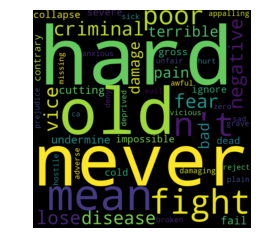

25
84
71
64
81
60
66
57
80
58
54
69
50
69
77
70
69
67
['sinister', 'guilty', 'pain', 'fail', 'fail', 'hard', "n't", 'fear', 'damaging', 'prejudice', 'never', 'negative', 'harmful', 'harmful', 'mean', 'negative', 'anxious', 'old', 'anxious', 'old', 'old', 'old', 'old', 'old', 'gross', 'unfair', 'unfair', 'fail', 'never', 'deprived', 'old', 'fear', 'never', 'fear', 'cruel', 'old', 'awful', 'vice', 'never', 'never', 'cutting', 'dead', 'never', 'never', 'mean', 'old', "n't", 'disgusting', 'prejudice', 'hard', 'hostile', 'severe', 'fear', 'old', 'mean', 'contrary', 'negative', "n't", "n't", 'never', 'old', 'fear', 'dead', 'reject', 'sad', 'damage', 'old', 'anxious', 'lose', 'never', 'anxious', 'gross', 'gross', 'terrible', 'unwise', 'collapse', 'poor', 'poor', 'mean', 'fail', 'appalling', 'sad', 'cruel', 'callous', 'vicious', 'terrible', 'terrible', 'evil', 'terrible', 'terrible', 'old', 'vicious', 'undermine', 'ignore', 'fear', 'never', 'cold', 'callous', 'appalling', 'terrible', 'pain', '

In [176]:
#2nd neg words dataset
neg_words = "abysmal,adverse,alarming,angry,annoy,anxious,apathy,appalling,atrocious,awful,bad,banal,barbed,belligerent,bemoan,beneath,boring,broken,callous,can't,cannot,clumsy,coarse,cold,collapse,confused,contradictory,contrary,corrosive,corrupt,crazy,creepy,criminal,cruel,cry,cutting,damage,damaging,dastardly,dead,decaying,deformed,deny,deplorable,depressed,deprived,despicable,detrimental,dirty,disease,disgusting,disheveled,dishonest,dishonorable,dismal,distress,don't,dreadful,dreary,enraged,eroding,evil,fail,faulty,fear,feeble,fight,filthy,foul,frighten,frightful,gawky,ghastly,grave,greed,grim,grimace,gross,grotesque,gruesome,guilty,haggard,hard,harmful,hate,hideous,horrendous,horrible,hostile,hurt,hurtful,icky,ignorant,ignore,ill,immature,imperfect,impossible,inane,inelegant,infernal,injure,injurious,insane,insidious,insipid,jealous,junky,lose,lousy,lumpy,malicious,mean,menacing,messy,misshapen,missing,misunderstood,moan,moldy,monstrous,naive,nasty,naughty,negate,negative,never,nonobody,nondescript,nonsense,not,noxious,objectionable,odious,offensive,old,oppressive,pain,perturb,pessimistic,petty,plain,poisonous,poor,prejudice,questionable,quirky,quit,reject,renege,repellant,reptilian,repugnant,repulsive,revenge,revolting,rocky,rotten,rude,ruthless,sad,savage,scare,scary,scream,severe,shocking,shoddy,sick,sickening,sinister,slimy,smelly,sobbing,sorry,spiteful,sticky,stinky,stormy,stressful,stuck,stupid,substandard,suspect,suspicious,tense,terrible,terrifying,threatening,ugly,undermine,unfair,unfavorable,unhappy,unhealthy,unjust,unlucky,unpleasant,unsatisfactory,unsightly,untoward,unwanted,unwelcome,unwholesome,unwieldy,unwise,upset,vice,vicious,vile,villainous,vindictive,wary,weary,wicked,woeful,worthless,wound,yell,yucky,zero"
neg_words = word_tokenize(neg_words)

# remove all instances of ","
neg_words = [word for word in neg_words if word != ","]
neg_words = [w for w in neg_words if not w in stop_words]
#print("There are %s negative words" % len(neg_words))

all_neg_words = [w for w in all_words if w in neg_words]

freq_neg_words = nltk.FreqDist(all_neg_words)

top_50_neg_words = [word[0] for word in freq_neg_words.most_common(50)]

top_50_neg_words_string = ""

for word in top_50_neg_words:
    top_50_neg_words_string += (word + " ")
    

# Create the wordcloud object
wordcloud = WordCloud(width=960, height=960).generate(top_50_neg_words_string)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


all_neg_words_1997 = [w for w in neg_words if w in speech_string_1997]
print(len(all_neg_words_1997))
all_neg_words_1998 = [w for w in neg_words if w in speech_string_1998]
print(len(all_neg_words_1998))
all_neg_words_1999 = [w for w in neg_words if w in speech_string_1999]
print(len(all_neg_words_1999))
all_neg_words_2000 = [w for w in neg_words if w in speech_string_2000]
print(len(all_neg_words_2000))
all_neg_words_2001 = [w for w in neg_words if w in speech_string_2001]
print(len(all_neg_words_2001))
all_neg_words_2002 = [w for w in neg_words if w in speech_string_2002]
print(len(all_neg_words_2002))
all_neg_words_2003 = [w for w in neg_words if w in speech_string_2003]
print(len(all_neg_words_2003))
all_neg_words_2004 = [w for w in neg_words if w in speech_string_2004]
print(len(all_neg_words_2004))
all_neg_words_2005 = [w for w in neg_words if w in speech_string_2005]
print(len(all_neg_words_2005))
all_neg_words_2009 = [w for w in neg_words if w in speech_string_2009]
print(len(all_neg_words_2009))
all_neg_words_2010 = [w for w in neg_words if w in speech_string_2010]
print(len(all_neg_words_2010))
all_neg_words_2011 = [w for w in neg_words if w in speech_string_2011]
print(len(all_neg_words_2011))
all_neg_words_2012 = [w for w in neg_words if w in speech_string_2012]
print(len(all_neg_words_2012))
all_neg_words_2014 = [w for w in neg_words if w in speech_string_2014]
print(len(all_neg_words_2014))
all_neg_words_2015 = [w for w in neg_words if w in speech_string_2015]
print(len(all_neg_words_2015))
all_neg_words_2016 = [w for w in neg_words if w in speech_string_2016]
print(len(all_neg_words_2016))
all_neg_words_2017 = [w for w in neg_words if w in speech_string_2017]
print(len(all_neg_words_2017))
all_neg_words_2018 = [w for w in neg_words if w in speech_string_2018]
print(len(all_neg_words_2018))

#print(all_neg_words)
# freq_neg_words = nltk.FreqDist(all_neg_words)
# print(len(freq_neg_words))
# print(freq_neg_words.most_common())

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

year = [ "98", "99", "00", "01", "02", "03", "04", "05", "09", "10", "11", "12", "14", "15", "16", "17", "18"]
total_pos = [154,146,151,153,136,138,132,171,122,136,131,144,139,153,146,150,141]
total_neg = [84,71,64,81,60,66,57,80,58,54,69,50,69,77,70,69,67]
#pos_neg = [[63,25],[154,84],[146,71],[151,64],[153,81],[136,60],[138,66],[132,57],[171,80],[122,58],[136,54],[131,69],[144,50],[139,69],[153,77],[146,70],[150,69]]

xpos = np.arange(len(total_pos))

plt.yticks(ypos, year)
plt.xlabel("No. of words")
plt.ylabel("Year")
plt.barh(xpos, total_pos, label = "pos")
plt.barh(xpos, total_neg,  label = "neg")
plt.legend()


# Create speech string for each individual Taoiseach

In [280]:
base_url = "https://www.taoiseach.gov.ie/eng/News/Taoiseach's_Speeches/?pageNumber="

count = 1

for page in range(1,38):
    r = requests.get(base_url + str(page))
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    all = soup.find_all("span",{"class":"ItemName"})
    for a in all:
        r = requests.get("https://www.taoiseach.gov.ie" + a.find("a")["href"])
        c = r.content
        
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find("div", {"class":"contentSub"}).text
        all = all.replace("var mapOverlayUrl = '';","")
        
        if count < 92:
            leo_string += all
            item = (word_tokenize(all), "fg")
            speech_list.append(item)
        elif count < 369:
            enda_string += all
            item = (word_tokenize(all), "fg")
            speech_list.append(item)
        count = count + 1


# Text Classification with NLTK

In [321]:
random.shuffle(speech_list)
all_words = word_tokenize(all_speeches_string)
#print(len(all_words)) #1667544
#print(speech_list[0])
print(type(speech_list[0]))

<class 'tuple'>


In [ ]:
all_words = nltk.FreqDist(all_words)
common_words =[]
for i in all_words.most_common(3000):
    common_words.append(i[0])
print(common_words)

In [314]:
def find_features(document):
    unique_words_in_document = set(document)
    features = {}
    for w in common_words:
        features[w] = [w in unique_words_in_document]
    return features

In [325]:
find_features(speech_list[0])

TypeError: unhashable type: 'list'

In [329]:
featuresets = []
for(review_words, review_category) in speech_list:
    featuresets.append((find_features(review_words),review_category))


In [330]:
training_set = featuresets[:1500]
test_set = featuresets[1500:]

classifier = nltk.NaiveBayesClassifier.train(training_set)
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy = ", accuracy * 100)

TypeError: unhashable type: 'list'